#**Intent Detection with Data Augmentation using pre-trained models**

#**1. Import, preprocess Dataset**

## Dataset1: SNIPS

In [ ]:
# #SNIPS
# !gdown --id 1OlcvGWReJMuyYQuOZm149vHWwPtlboR6 --output train.csv
# !gdown --id 1Oi5cRlTybuIF2Fl5Bfsr-KkqrXrdt77w --output valid.csv
# !gdown --id 1ep9H6-HvhB4utJRLVcLzieWNUSG3P_uF --output test.csv

In [ ]:
# import pandas as pd
# import numpy as np

# train = pd.read_csv("train.csv")
# valid = pd.read_csv("valid.csv")
# test = pd.read_csv("test.csv")

# print(f"train: {train.shape} \n{train.head()}" )
# print(f"\nvalid: {valid.shape} \n{valid.head()}" )
# print(f"\ntest: {test.shape} \n{test.head()}" )

## Dataset 2: ATIS

In [ ]:
# from google.colab import drive
# import pandas as pd

# # 将Google Drive挂载到Colab上
# drive.mount('/content/drive')
# root = 'drive/My Drive/Dataset/ATIS/'

# # 用pandas读取CSV文件
# train = pd.read_csv(root + 'atis_train.csv')
# test = pd.read_csv(root + 'atis_test.csv')

# print(f"train: {train.shape} \n{train.head()}" )
# print(f"\ntest: {test.shape} \n{test.head()}" )

## Dataset 3: TREC

In [ ]:
from google.colab import drive
import pandas as pd

drive.mount('/content/drive')
root = 'drive/My Drive/Dataset/TREC/'

# 用pandas读取CSV文件
train = pd.read_csv(root + 'trec_train.csv')
test = pd.read_csv(root + 'trec_test.csv')

print(f"train: {train.shape} \n{train.head()}" )
print(f"\ntest: {test.shape} \n{test.head()}" )

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
train: (5452, 3) 
   label-coarse  label-fine                                               text
0             0           0  How did serfdom develop in and then leave Russ...
1             1           1   What films featured the character Popeye Doyle ?
2             0           0  How can I find a list of celebrities ' real na...
3             1           2  What fowl grabs the spotlight after the Chines...
4             2           3                    What is the full form of .com ?

test: (500, 3) 
   label-coarse  label-fine                                      text
0             4          40      How far is it from Denver to Aspen ?
1             5          21  What county is Modesto , California in ?
2             3          12                         Who was Galileo ?
3             0           7                         What is an atom ?
4           

In [ ]:
train.rename(columns={'label-coarse': 'intent'}, inplace=True)
test.rename(columns={'label-coarse': 'intent'}, inplace=True)

In [ ]:
train = train[['text', 'intent']]
test = test[['text', 'intent']]

In [ ]:
train

,text,intent
0,How did serfdom develop in and then leave Russ...,0
1,What films featured the character Popeye Doyle ?,1
2,How can I find a list of celebrities ' real na...,0
3,What fowl grabs the spotlight after the Chines...,1
4,What is the full form of .com ?,2
...,...,...
5447,What 's the shape of a camel 's spine ?,1
5448,What type of currency is used in China ?,1
5449,What is the temperature today ?,4
5450,What is the temperature for cooking ?,4


##1-1. Visualization

<ipython-input-8-fbadef687759>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  chart = sns.countplot(x = 'intent', data = train, palette='Set1')
<ipython-input-8-fbadef687759>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  chart.set_xticklabels(chart.get_xticklabels(), rotation = 30, horizontalalignment='right', fontweight='light', fontsize='medium')


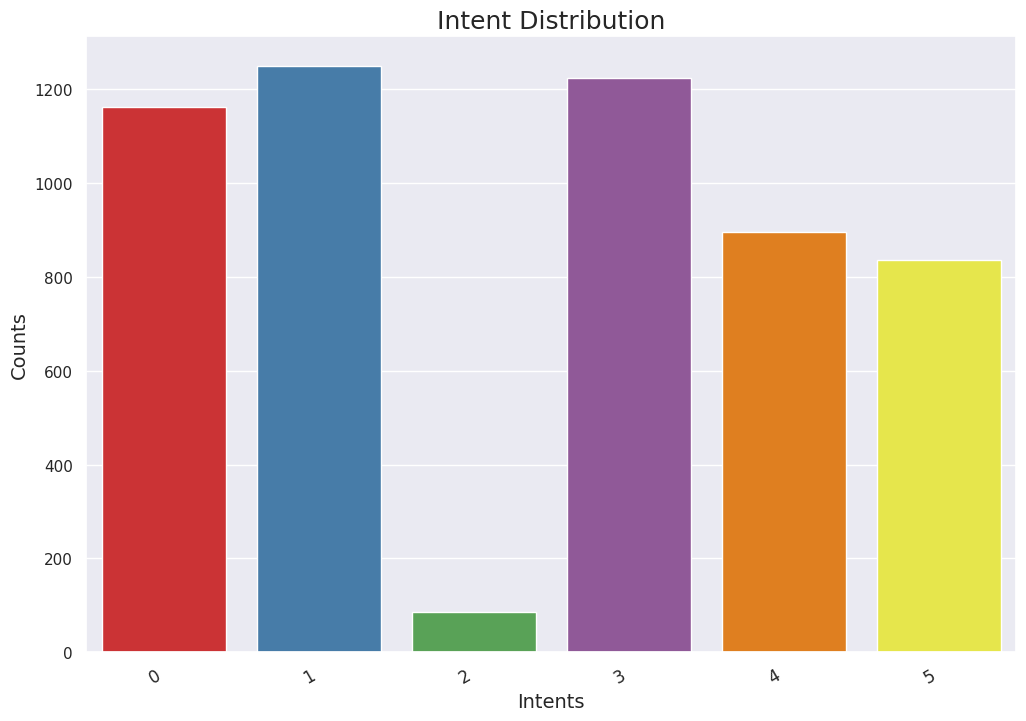

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set()
plt.figure(figsize = (12, 8))
chart = sns.countplot(x = 'intent', data = train, palette='Set1')
chart.set_xticklabels(chart.get_xticklabels(), rotation = 30, horizontalalignment='right', fontweight='light', fontsize='medium')
chart.set_title('Intent Distribution', fontsize = 18)
chart.set_xlabel('Intents', fontsize = 14)
chart.set_ylabel('Counts', fontsize = 14)
plt.show()

#2. Start Few-shot Scenario (開始切資料)

##2-1. 隨機抽樣十次取平均 (50 samples per intent and take average)

In [ ]:
#每個intent各抽50筆 => 350筆訓練資料（為了做10次取平均）
import pandas as pd
import random
import numpy as np

intents = train['intent'].unique()
selected_data = pd.DataFrame(columns=['text', 'intent'])
sample_size = 50

for intent in intents:
    intent_data = train[train['intent'] == intent]
    if len(intent_data) >= sample_size:
        samples = intent_data.sample(n=sample_size, random_state=42)
        selected_data = selected_data.append(samples)

<ipython-input-9-8d444c1cb2ac>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  selected_data = selected_data.append(samples)
<ipython-input-9-8d444c1cb2ac>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  selected_data = selected_data.append(samples)
<ipython-input-9-8d444c1cb2ac>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  selected_data = selected_data.append(samples)
<ipython-input-9-8d444c1cb2ac>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  selected_data = selected_data.append(samples)
<ipython-input-9-8d444c1cb2ac>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future vers

In [ ]:
selected_data

,text,intent
1143,What is a handheld PC ?,0
433,What does the name Billie mean ?,0
5053,How is Answers.com funded ?,0
2689,What is troilism ?,0
3508,What is the purpose of BIOS ?,0
...,...,...
435,What is the highest peak in Africa ?,5
5190,Where were the 1936 Summer Olympics held ?,5
4053,What is the capital of Uruguay ?,5
3290,What is the best online games site ?,5


In [ ]:
dataset = {}

for i in range(1, 11):
    small_dataframes = pd.DataFrame()  # 用于合并所有小的DataFrame
    for intent in intents:
        select = selected_data[selected_data['intent'] == intent]
        small_df = select[i*5-5:i*5]
        small_dataframes = pd.concat([small_dataframes, small_df])  # 合并到一个小的DataFrame

    dataset[f'small_dataset{i}'] = small_dataframes  # 存储小的DataFrame

#**3. Implement Data Augmentation on original dataset**

In [ ]:
!pip install transformers
!pip install sentencepiece
!wget https://raw.githubusercontent.com/google/sentencepiece/master/data/botchan.txt

--2024-01-31 10:17:28--  https://raw.githubusercontent.com/google/sentencepiece/master/data/botchan.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 278779 (272K) [text/plain]
Saving to: ‘botchan.txt.1’

botchan.txt.1       100%[===================>] 272.25K  --.-KB/s    in 0.03s   

2024-01-31 10:17:29 (9.95 MB/s) - ‘botchan.txt.1’ saved [278779/278779]



In [ ]:
#套件下載
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset, RandomSampler
from transformers import BertTokenizer, BertModel, BertForSequenceClassification
from transformers import InputExample, InputFeatures
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM

## 3-1. (Phase 1) Data Augmentation on "Text Space"
*   3-1-1. Back Translation
*   3-1-2. T5 Paraphrasing
*   3-1-3. EDA



### 3-1-1. Back Translation

In [ ]:
#定義一個back translation的function
#記得移到GPU做比較快

from transformers import MarianTokenizer, MarianMTModel, pipeline
import sentencepiece

def back_trans(text, tokenizer, model, backtrans_tokenizer, backtrans_model):
  # 初始化 tokenizer 和 model
  # 使用 pipeline 進行翻譯
  translator = pipeline("translation", model=model, tokenizer=tokenizer)
  result = translator(text, max_length=40)
  backtrans_translator = pipeline("translation", model=backtrans_model, tokenizer=backtrans_tokenizer)
  backtrans_result = backtrans_translator(result[0]['translation_text'], max_length=40)
  return backtrans_result[0]['translation_text']

In [ ]:
import pandas as pd
import sentencepiece

#用來存所有小資料集生成的小augmented資料集
backtrans_augmented_dataset = {}

tokenizer = MarianTokenizer.from_pretrained("Helsinki-NLP/opus-mt-en-fr")
model = MarianMTModel.from_pretrained("Helsinki-NLP/opus-mt-en-fr")
backtrans_tokenizer = MarianTokenizer.from_pretrained("Helsinki-NLP/opus-mt-fr-en")
backtrans_model = MarianMTModel.from_pretrained("Helsinki-NLP/opus-mt-fr-en")

#根據range決定要用的資料集(1-10)
#先複製原本的文本到augmented_dataset
for i in range(2, 3):
  backtrans_augmented_dataset[f'small_dataset{i}'] = dataset[f'small_dataset{i}'].copy()
  backtrans_augmented_dataset[f'small_dataset{i}']['text'] = backtrans_augmented_dataset[f'small_dataset{i}']['text'].apply(back_trans, tokenizer=tokenizer, model=model, backtrans_tokenizer=backtrans_tokenizer, backtrans_model=backtrans_model)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/models/marian/tokenization_marian.py:197: UserWarning: Recommended: pip install sacremoses.
  warnings.warn("Recommended: pip install sacremoses.")


### 3-1-2. T5 Paraphrasing

In [ ]:
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM

device = "cuda"
tokenizer = AutoTokenizer.from_pretrained("humarin/chatgpt_paraphraser_on_T5_base")
model = AutoModelForSeq2SeqLM.from_pretrained("humarin/chatgpt_paraphraser_on_T5_base").to(device)

def paraphrase(
    question,
    num_beams=5,
    num_beam_groups=5,
    num_return_sequences=1,
    repetition_penalty=10.0,
    diversity_penalty=3.0,
    no_repeat_ngram_size=2,
    temperature=0.1,
    max_length=128
):
    input_ids = tokenizer(
        f'paraphrase: {question}',
        return_tensors="pt", padding="longest",
        max_length=max_length,
        truncation=True,
    ).input_ids

    input_ids = input_ids.to(device)

    outputs = model.generate(
        input_ids, temperature=temperature, repetition_penalty=repetition_penalty,
        num_return_sequences=num_return_sequences, no_repeat_ngram_size=no_repeat_ngram_size,
        num_beams=num_beams, num_beam_groups=num_beam_groups,
        max_length=max_length, diversity_penalty=diversity_penalty
    )

    res = tokenizer.batch_decode(outputs, skip_special_tokens=True)

    return res[0]


In [ ]:
import pandas as pd
#用來存所有小資料集生成的小augmented資料集
t5_augmented_dataset = {}

#根據range決定要用的資料集(1-10)
#先複製原本的文本到augmented_dataset
for i in range(2, 3):
  t5_augmented_dataset[f'small_dataset{i}'] = dataset[f'small_dataset{i}'].copy()
  #開始做back translation，做完存進dictionary
  t5_augmented_dataset[f'small_dataset{i}']['text'] = t5_augmented_dataset[f'small_dataset{i}']['text'].apply(paraphrase)

/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:381: UserWarning: `do_sample` is set to `False`. However, `temperature` is set to `0.1` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `temperature`.
  warnings.warn(


### 3-1-3. Easy Data Augmentation (EDA)

In [ ]:
import nltk
nltk.download('wordnet')
import random
from random import shuffle
random.seed(1)

#stop words list
stop_words = ['i', 'me', 'my', 'myself', 'we', 'our',
			'ours', 'ourselves', 'you', 'your', 'yours',
			'yourself', 'yourselves', 'he', 'him', 'his',
			'himself', 'she', 'her', 'hers', 'herself',
			'it', 'its', 'itself', 'they', 'them', 'their',
			'theirs', 'themselves', 'what', 'which', 'who',
			'whom', 'this', 'that', 'these', 'those', 'am',
			'is', 'are', 'was', 'were', 'be', 'been', 'being',
			'have', 'has', 'had', 'having', 'do', 'does', 'did',
			'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or',
			'because', 'as', 'until', 'while', 'of', 'at',
			'by', 'for', 'with', 'about', 'against', 'between',
			'into', 'through', 'during', 'before', 'after',
			'above', 'below', 'to', 'from', 'up', 'down', 'in',
			'out', 'on', 'off', 'over', 'under', 'again',
			'further', 'then', 'once', 'here', 'there', 'when',
			'where', 'why', 'how', 'all', 'any', 'both', 'each',
			'few', 'more', 'most', 'other', 'some', 'such', 'no',
			'nor', 'not', 'only', 'own', 'same', 'so', 'than', 'too',
			'very', 's', 't', 'can', 'will', 'just', 'don',
			'should', 'now', '']

#cleaning up text
import re
def get_only_chars(line):

    clean_line = ""

    line = line.replace("’", "")
    line = line.replace("'", "")
    line = line.replace("-", " ") #replace hyphens with spaces
    line = line.replace("\t", " ")
    line = line.replace("\n", " ")
    line = line.lower()

    for char in line:
        if char in 'qwertyuiopasdfghjklzxcvbnm ':
            clean_line += char
        else:
            clean_line += ' '

    clean_line = re.sub(' +',' ',clean_line) #delete extra spaces
    if clean_line[0] == ' ':
        clean_line = clean_line[1:]
    return clean_line

########################################################################
# Synonym replacement
# Replace n words in the sentence with synonyms from wordnet
########################################################################

#for the first time you use wordnet
#import nltk
#nltk.download('wordnet')
from nltk.corpus import wordnet

def synonym_replacement(words, n):
	new_words = words.copy()
	random_word_list = list(set([word for word in words if word not in stop_words]))
	random.shuffle(random_word_list)
	num_replaced = 0
	for random_word in random_word_list:
		synonyms = get_synonyms(random_word)
		if len(synonyms) >= 1:
			synonym = random.choice(list(synonyms))
			new_words = [synonym if word == random_word else word for word in new_words]
			#print("replaced", random_word, "with", synonym)
			num_replaced += 1
		if num_replaced >= n: #only replace up to n words
			break

	#this is stupid but we need it, trust me
	sentence = ' '.join(new_words)
	new_words = sentence.split(' ')

	return new_words

def get_synonyms(word):
	synonyms = set()
	for syn in wordnet.synsets(word):
		for l in syn.lemmas():
			synonym = l.name().replace("_", " ").replace("-", " ").lower()
			synonym = "".join([char for char in synonym if char in ' qwertyuiopasdfghjklzxcvbnm'])
			synonyms.add(synonym)
	if word in synonyms:
		synonyms.remove(word)
	return list(synonyms)

########################################################################
# Random deletion
# Randomly delete words from the sentence with probability p
########################################################################

def random_deletion(words, p):

	#obviously, if there's only one word, don't delete it
	if len(words) == 1:
		return words

	#randomly delete words with probability p
	new_words = []
	for word in words:
		r = random.uniform(0, 1)
		if r > p:
			new_words.append(word)

	#if you end up deleting all words, just return a random word
	if len(new_words) == 0:
		rand_int = random.randint(0, len(words)-1)
		return [words[rand_int]]

	return new_words

########################################################################
# Random swap
# Randomly swap two words in the sentence n times
########################################################################

def random_swap(words, n):
	new_words = words.copy()
	for _ in range(n):
		new_words = swap_word(new_words)
	return new_words

def swap_word(new_words):
	random_idx_1 = random.randint(0, len(new_words)-1)
	random_idx_2 = random_idx_1
	counter = 0
	while random_idx_2 == random_idx_1:
		random_idx_2 = random.randint(0, len(new_words)-1)
		counter += 1
		if counter > 3:
			return new_words
	new_words[random_idx_1], new_words[random_idx_2] = new_words[random_idx_2], new_words[random_idx_1]
	return new_words

########################################################################
# Random insertion
# Randomly insert n words into the sentence
########################################################################

def random_insertion(words, n):
	new_words = words.copy()
	for _ in range(n):
		add_word(new_words)
	return new_words

def add_word(new_words):
	synonyms = []
	counter = 0
	while len(synonyms) < 1:
		random_word = new_words[random.randint(0, len(new_words)-1)]
		synonyms = get_synonyms(random_word)
		counter += 1
		if counter >= 10:
			return
	random_synonym = synonyms[0]
	random_idx = random.randint(0, len(new_words)-1)
	new_words.insert(random_idx, random_synonym)

########################################################################
# main data augmentation function
########################################################################

def eda(sentence, alpha_sr=0.1, alpha_ri=0.1, alpha_rs=0.1, p_rd=0.1, num_aug=1):

	sentence = get_only_chars(sentence)
	words = sentence.split(' ')
	words = [word for word in words if word is not '']
	num_words = len(words)

	augmented_sentences = []
	num_new_per_technique = int(num_aug/4)+1

	#sr
	if (alpha_sr > 0):
		n_sr = max(1, int(alpha_sr*num_words))
		for _ in range(num_new_per_technique):
			a_words = synonym_replacement(words, n_sr)
			augmented_sentences.append(' '.join(a_words))

	#ri
	if (alpha_ri > 0):
		n_ri = max(1, int(alpha_ri*num_words))
		for _ in range(num_new_per_technique):
			a_words = random_insertion(words, n_ri)
			augmented_sentences.append(' '.join(a_words))

	#rs
	if (alpha_rs > 0):
		n_rs = max(1, int(alpha_rs*num_words))
		for _ in range(num_new_per_technique):
			a_words = random_swap(words, n_rs)
			augmented_sentences.append(' '.join(a_words))

	#rd
	if (p_rd > 0):
		for _ in range(num_new_per_technique):
			a_words = random_deletion(words, p_rd)
			augmented_sentences.append(' '.join(a_words))

	augmented_sentences = [get_only_chars(sentence) for sentence in augmented_sentences]
	shuffle(augmented_sentences)

	#trim so that we have the desired number of augmented sentences
	if num_aug >= 1:
		augmented_sentences = augmented_sentences[:num_aug]
	else:
		keep_prob = num_aug / len(augmented_sentences)
		augmented_sentences = [s for s in augmented_sentences if random.uniform(0, 1) < keep_prob]

	#append the original sentence
	augmented_sentences.append(sentence)

	return augmented_sentences[0]

<>:176: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<>:176: SyntaxWarning: "is not" with a literal. Did you mean "!="?
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
<ipython-input-18-021e2963bece>:176: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  words = [word for word in words if word is not '']


In [ ]:
import pandas as pd
#用來存所有小資料集生成的小augmented資料集
eda_augmented_dataset = {}

#根據range決定要用的資料集(1-10)
#先複製原本的文本到augmented_dataset
for i in range(2, 3):
  eda_augmented_dataset[f'small_dataset{i}'] = dataset[f'small_dataset{i}'].copy()
  #開始做back translation，做完存進dictionary
  eda_augmented_dataset[f'small_dataset{i}']['text'] = eda_augmented_dataset[f'small_dataset{i}']['text'].apply(eda)

#**4. Start Training**
*   4-1. concat original dataset with phase 1 augmented dataset
*   4-2. start fine tuning BERT
*   4-3. use fine tuned BERT to get embedding



## 4-1. 準備好phase 1用的train_dataset：(Phase1)_train_dataset
-> original_dataset[f'small_dataset{i}'] + (phase1)_augmented_dataset[f'small_dataset{i}']

In [ ]:
backtrans_train_dataset = {}
t5_train_dataset = {}
eda_train_dataset = {}

for i in range(2, 3):
  original_dataset = dataset[f'small_dataset{i}']

  backtrans_train_dataset[f'small_dataset{i}'] = pd.concat([original_dataset, backtrans_augmented_dataset[f'small_dataset{i}']])
  t5_train_dataset[f'small_dataset{i}'] = pd.concat([original_dataset, t5_augmented_dataset[f'small_dataset{i}']])
  eda_train_dataset[f'small_dataset{i}'] = pd.concat([original_dataset, eda_augmented_dataset[f'small_dataset{i}']])

## 4-2. 開始fine tune BERT


In [ ]:
#turning datasets into input for BERT

def preprocessing(selected_data, tokenizer):
    # Dataframe轉InputExample
    selected_data = [InputExample(guid=str(i), text_a=row['text'], label=row['intent']) for i, row in selected_data.iterrows()]

    # InputExample轉成餵給BERT的input
    train_features = []

    for example in selected_data:
        inputs = tokenizer.encode_plus(
            example.text_a,
            add_special_tokens=True,
            max_length=128,
            pad_to_max_length=True,
            return_attention_mask=True,
        )
        train_features.append(InputFeatures(**inputs, label=example.label))

    # intent轉成numeric label(FOR SNIPS)
    # intent_to_label = {
    #     "PlayMusic": 0, 'AddToPlaylist': 1, 'RateBook': 2, 'SearchScreeningEvent': 3,
    #     'BookRestaurant': 4, 'GetWeather': 5, 'SearchCreativeWork': 6
    # }

    # 得到的features轉成 PyTorch tensors
    input_ids = torch.tensor([f.input_ids for f in train_features], dtype=torch.long)
    attention_mask = torch.tensor([f.attention_mask for f in train_features], dtype=torch.long)

    # SNIPS
    # labels = torch.tensor([intent_to_label[f.label] for f in train_features], dtype=torch.long)

    #TREC
    labels = torch.tensor([f.label for f in train_features], dtype=torch.long)

    # 將tensor裝進DataLoader
    train_dataset = TensorDataset(input_ids, attention_mask, labels)
    train_sampler = RandomSampler(train_dataset)
    train_dataloader = DataLoader(train_dataset, sampler=train_sampler, batch_size=32)

    return train_dataloader

In [ ]:
def finetune (dataset):
  #用Range來決定要使用的小資料集(0-9)
    train_losses = []
    model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=6) ##intent Label數量在此
    tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
    train_dataloader = preprocessing(dataset, tokenizer)

    criterion = nn.CrossEntropyLoss()
    optimizer = optim.AdamW(model.parameters(), lr=1e-5)  # 使用 AdamW 優化器

    num_epochs = 200  #設置epoch參數
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")  # 使用GPU
    model.to(device)  #讓模型使用GPU

    for epoch in range(num_epochs):
        model.train()
        total_loss = 0.0

        for batch in train_dataloader:
            input_ids, attention_mask, labels = batch
            input_ids, attention_mask, labels = input_ids.to(device), attention_mask.to(device), labels.to(device)

            optimizer.zero_grad()
            outputs = model(input_ids, attention_mask=attention_mask, labels=labels, output_hidden_states=True)
            loss = outputs.loss
            loss.backward()
            optimizer.step()

            total_loss += loss.item()

        avg_loss = total_loss / len(train_dataloader)
        train_losses.append(avg_loss)  # 将每个 epoch 的损失值添加到列表中
        print(f'Epoch {epoch+1}/{num_epochs}, Loss: {avg_loss}')

    plt.plot(range(1, num_epochs+1), train_losses, label='Training Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Training Loss Over Time')
    plt.legend()
    plt.show()
    return model

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:2614: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In t

Epoch 1/200, Loss: 1.825356364250183
Epoch 2/200, Loss: 1.776689887046814
Epoch 3/200, Loss: 1.8032928705215454
Epoch 4/200, Loss: 1.7276184558868408
Epoch 5/200, Loss: 1.722442865371704
Epoch 6/200, Loss: 1.6758989095687866
Epoch 7/200, Loss: 1.6307710409164429
Epoch 8/200, Loss: 1.650383710861206
Epoch 9/200, Loss: 1.5705825090408325
Epoch 10/200, Loss: 1.5637013912200928
Epoch 11/200, Loss: 1.5390141010284424
Epoch 12/200, Loss: 1.4763798713684082
Epoch 13/200, Loss: 1.5092034339904785
Epoch 14/200, Loss: 1.4125959873199463
Epoch 15/200, Loss: 1.4330086708068848
Epoch 16/200, Loss: 1.439935564994812
Epoch 17/200, Loss: 1.390587329864502
Epoch 18/200, Loss: 1.437994122505188
Epoch 19/200, Loss: 1.3931910991668701
Epoch 20/200, Loss: 1.3586347103118896
Epoch 21/200, Loss: 1.3861720561981201
Epoch 22/200, Loss: 1.346350073814392
Epoch 23/200, Loss: 1.2802561521530151
Epoch 24/200, Loss: 1.3047183752059937
Epoch 25/200, Loss: 1.3037899732589722
Epoch 26/200, Loss: 1.2608119249343872
Epo

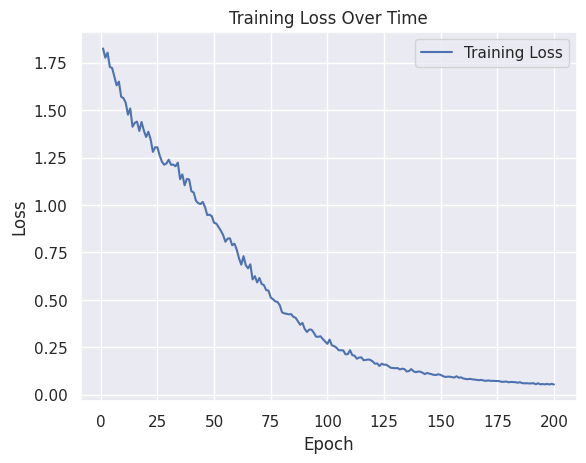

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.


Epoch 1/200, Loss: 1.785717248916626
Epoch 2/200, Loss: 1.7607952952384949
Epoch 3/200, Loss: 1.7606713771820068
Epoch 4/200, Loss: 1.722226858139038
Epoch 5/200, Loss: 1.666879415512085
Epoch 6/200, Loss: 1.6281548142433167
Epoch 7/200, Loss: 1.6049113273620605
Epoch 8/200, Loss: 1.566436529159546
Epoch 9/200, Loss: 1.5092554092407227
Epoch 10/200, Loss: 1.4528740048408508
Epoch 11/200, Loss: 1.4367452263832092
Epoch 12/200, Loss: 1.3724172711372375
Epoch 13/200, Loss: 1.3726457953453064
Epoch 14/200, Loss: 1.3199877738952637
Epoch 15/200, Loss: 1.2761342525482178
Epoch 16/200, Loss: 1.228829562664032
Epoch 17/200, Loss: 1.1989848017692566
Epoch 18/200, Loss: 1.1544862389564514
Epoch 19/200, Loss: 1.1070120930671692
Epoch 20/200, Loss: 1.0909554958343506
Epoch 21/200, Loss: 1.0282440781593323
Epoch 22/200, Loss: 0.9975155293941498
Epoch 23/200, Loss: 0.9834611713886261
Epoch 24/200, Loss: 0.8928943574428558
Epoch 25/200, Loss: 0.8746940791606903
Epoch 26/200, Loss: 0.8444143831729889


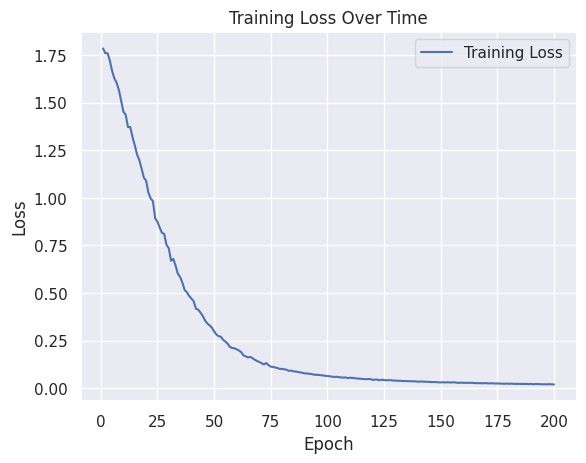

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.


Epoch 1/200, Loss: 1.8194127678871155
Epoch 2/200, Loss: 1.7828298807144165
Epoch 3/200, Loss: 1.7434701919555664
Epoch 4/200, Loss: 1.773449420928955
Epoch 5/200, Loss: 1.734660565853119
Epoch 6/200, Loss: 1.6775936484336853
Epoch 7/200, Loss: 1.6503584384918213
Epoch 8/200, Loss: 1.620891809463501
Epoch 9/200, Loss: 1.5589226484298706
Epoch 10/200, Loss: 1.5631245374679565
Epoch 11/200, Loss: 1.493530511856079
Epoch 12/200, Loss: 1.4771748781204224
Epoch 13/200, Loss: 1.488233745098114
Epoch 14/200, Loss: 1.450542151927948
Epoch 15/200, Loss: 1.3939761519432068
Epoch 16/200, Loss: 1.3689228892326355
Epoch 17/200, Loss: 1.3612675070762634
Epoch 18/200, Loss: 1.3330118060112
Epoch 19/200, Loss: 1.2768610715866089
Epoch 20/200, Loss: 1.292495846748352
Epoch 21/200, Loss: 1.257979393005371
Epoch 22/200, Loss: 1.1989277005195618
Epoch 23/200, Loss: 1.1733715534210205
Epoch 24/200, Loss: 1.1394721269607544
Epoch 25/200, Loss: 1.1058425307273865
Epoch 26/200, Loss: 1.0823366045951843
Epoch 

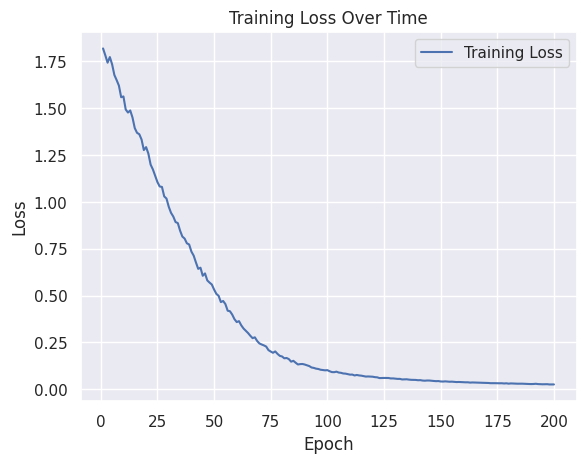

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.


Epoch 1/200, Loss: 1.824819803237915
Epoch 2/200, Loss: 1.7875795364379883
Epoch 3/200, Loss: 1.7875841856002808
Epoch 4/200, Loss: 1.7345302104949951
Epoch 5/200, Loss: 1.7080344557762146
Epoch 6/200, Loss: 1.6550344824790955
Epoch 7/200, Loss: 1.589656114578247
Epoch 8/200, Loss: 1.555158257484436
Epoch 9/200, Loss: 1.530684471130371
Epoch 10/200, Loss: 1.486554741859436
Epoch 11/200, Loss: 1.4518892765045166
Epoch 12/200, Loss: 1.3863877654075623
Epoch 13/200, Loss: 1.334936499595642
Epoch 14/200, Loss: 1.3299006223678589
Epoch 15/200, Loss: 1.2495232224464417
Epoch 16/200, Loss: 1.2155723571777344
Epoch 17/200, Loss: 1.2152793407440186
Epoch 18/200, Loss: 1.1761339902877808
Epoch 19/200, Loss: 1.1266640424728394
Epoch 20/200, Loss: 1.0852505564689636
Epoch 21/200, Loss: 1.0479304194450378
Epoch 22/200, Loss: 1.0345031023025513
Epoch 23/200, Loss: 0.9764090776443481
Epoch 24/200, Loss: 0.9488968551158905
Epoch 25/200, Loss: 0.9355316162109375
Epoch 26/200, Loss: 0.8934557437896729
E

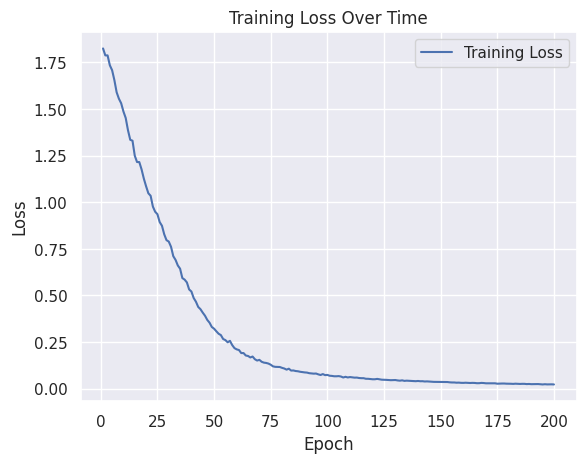

In [ ]:
for i in range(2, 3):
  model1 = finetune(dataset[f'small_dataset{i}'])
  model2 = finetune(backtrans_train_dataset[f'small_dataset{i}'])
  model3 = finetune(t5_train_dataset[f'small_dataset{i}'])
  model4 = finetune(eda_train_dataset[f'small_dataset{i}'])

##4-3. 用fine tune好的模型取embedding

In [ ]:
def text_to_embedding(text, model, tokenizer, device):
  inputs = tokenizer(text, return_tensors="pt", padding=True, truncation=True, max_length=128)

  with torch.no_grad():
      outputs = model(**inputs.to(device), output_hidden_states=True)
  embedding = outputs.hidden_states[12][0][0].tolist()
  return embedding

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

#參數"model"決定feature extractor所使用的模型。model1為以original dataset為訓練資料

for i in range(2, 3):
  dataset[f'small_dataset{i}']['embedding'] = dataset[f'small_dataset{i}']['text'].apply(text_to_embedding, model=model1, tokenizer=tokenizer, device=device)
  backtrans_train_dataset[f'small_dataset{i}']['embedding'] = backtrans_train_dataset[f'small_dataset{i}']['text'].apply(text_to_embedding, model=model2, tokenizer=tokenizer, device=device)
  t5_train_dataset[f'small_dataset{i}']['embedding'] = t5_train_dataset[f'small_dataset{i}']['text'].apply(text_to_embedding, model=model3, tokenizer=tokenizer, device=device)
  eda_train_dataset[f'small_dataset{i}']['embedding'] = eda_train_dataset[f'small_dataset{i}']['text'].apply(text_to_embedding, model=model4, tokenizer=tokenizer, device=device)

## 4-4. (Phase 2) Feature Space
*   4-4-1. CVAE
*   Linear Delta
*   Extrapolation





### 4-4-1. CVAE

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class CVAE(nn.Module):
    def __init__(self, input_dim, latent_dim, num_classes):
        super(CVAE, self).__init__()

        # Encoder
        self.encoder = nn.Sequential(
            nn.Linear(input_dim + 1, 2048),
            nn.Tanh(),
            nn.Linear(2048, 128),
            nn.Tanh()
        )

        # Latent space parameters
        self.z_mean = nn.Linear(128, latent_dim)
        self.z_log_var = nn.Linear(128, latent_dim)

        # Decoder
        self.decoder = nn.Sequential(
            nn.Linear(latent_dim + 1 , 2048),
            nn.Tanh(),
            nn.Linear(2048, input_dim),
            nn.Sigmoid()
        )

    def reparameterize(self, mu, log_var):
        # 从正态分布中采样潜在变量
        std = torch.exp(0.5 * log_var)
        eps = torch.randn_like(std)
        return mu + eps * std

    def forward(self, x, y):
        # 将输入特征和类别信息连接起来
        input_data = torch.cat((x, y), dim=1)
        # 编码器计算均值和对数方差
        h = self.encoder(input_data)
        mu = self.z_mean(h)
        log_var = self.z_log_var(h)

        # 从均值和对数方差中重参数化采样
        z = self.reparameterize(mu, log_var)

        # 将采样的潜在变量与类别信息连接起来，用于解码
        z_y = torch.cat((z, y), dim=1)

        # 解码器生成重建的输入
        reconstruction = self.decoder(z_y)

        return reconstruction, mu, log_var, z

In [ ]:
def cvae_preprocessing(dataset):

  # intent_to_label = {
  #       "PlayMusic": 0, 'AddToPlaylist': 1, 'RateBook': 2, 'SearchScreeningEvent': 3,
  #       'BookRestaurant': 4, 'GetWeather': 5, 'SearchCreativeWork': 6
  # }
  batch_size = 8 #可調小

  for i in range(2, 3):
    train_dataset = TensorDataset(
        torch.tensor(dataset[f'small_dataset{i}']['embedding'].tolist(), dtype=torch.float),
        # torch.tensor(dataset[f'small_dataset{i}']['intent'].map(intent_to_label).tolist(), dtype=torch.long).unsqueeze(1)
        torch.tensor(dataset[f'small_dataset{i}']['intent'].tolist(), dtype=torch.long).unsqueeze(1)
    )
    dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

  return dataloader

def cvae_train(dataset):

    num_epochs = 100 #可以100即可
    latent_dim = 128
    input_dim = 768
    num_classes = 6

    vae = CVAE(input_dim, latent_dim, num_classes)
    optimizer = optim.Adam(vae.parameters(), lr=5e-5) ##1e-5?
    criterion = nn.MSELoss()
    dataloader = cvae_preprocessing(dataset)
    training_losses = []

    vae.train()
    for epoch in range(num_epochs):
        total_loss = 0.0
        for batch in dataloader:
            embedding, label = batch
            optimizer.zero_grad()
            outputs, mu, log_var, z = vae(embedding, label)

            loss = criterion(outputs, embedding) + 0.5 * torch.sum(torch.exp(log_var) + mu**2 - 1 - log_var)
            loss.backward()
            optimizer.step()
            total_loss += loss.item()

        avg_loss = total_loss / len(dataloader)
        training_losses.append(avg_loss)

        print(f'Epoch {epoch + 1}/{num_epochs}, Loss: {avg_loss}')

    plt.plot(training_losses, label='Training Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

    return vae

Epoch 1/100, Loss: 8.789966821670532
Epoch 2/100, Loss: 4.909937024116516
Epoch 3/100, Loss: 3.899899423122406
Epoch 4/100, Loss: 3.386089563369751
Epoch 5/100, Loss: 2.9339234828948975
Epoch 6/100, Loss: 2.5985368490219116
Epoch 7/100, Loss: 2.330419182777405
Epoch 8/100, Loss: 2.116578698158264
Epoch 9/100, Loss: 1.9472236633300781
Epoch 10/100, Loss: 1.8067365884780884
Epoch 11/100, Loss: 1.6792977154254913
Epoch 12/100, Loss: 1.5682574808597565
Epoch 13/100, Loss: 1.4657016396522522
Epoch 14/100, Loss: 1.3762000501155853
Epoch 15/100, Loss: 1.2964311242103577
Epoch 16/100, Loss: 1.2234919667243958
Epoch 17/100, Loss: 1.1532719135284424
Epoch 18/100, Loss: 1.0882176458835602
Epoch 19/100, Loss: 1.0290875285863876
Epoch 20/100, Loss: 0.9776899218559265
Epoch 21/100, Loss: 0.9300261735916138
Epoch 22/100, Loss: 0.8846930861473083
Epoch 23/100, Loss: 0.8450068235397339
Epoch 24/100, Loss: 0.805240273475647
Epoch 25/100, Loss: 0.774327427148819
Epoch 26/100, Loss: 0.7514500766992569
Epo

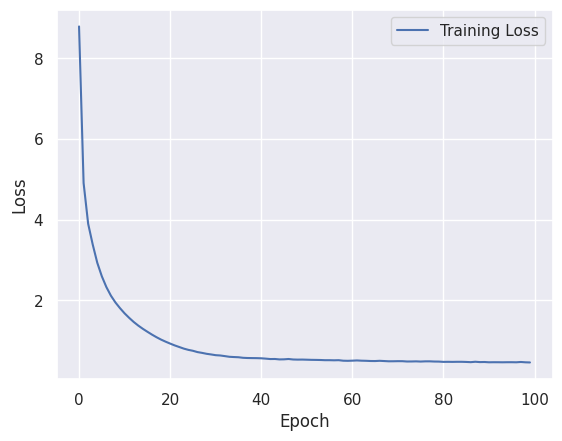

Epoch 1/100, Loss: 7.059255629777908
Epoch 2/100, Loss: 3.799008011817932
Epoch 3/100, Loss: 3.0236335396766663
Epoch 4/100, Loss: 2.583636701107025
Epoch 5/100, Loss: 2.257938474416733
Epoch 6/100, Loss: 2.020695924758911
Epoch 7/100, Loss: 1.8206677436828613
Epoch 8/100, Loss: 1.6390538662672043
Epoch 9/100, Loss: 1.4888481050729752
Epoch 10/100, Loss: 1.3433591052889824
Epoch 11/100, Loss: 1.2175877168774605
Epoch 12/100, Loss: 1.1107536107301712
Epoch 13/100, Loss: 1.0210042297840118
Epoch 14/100, Loss: 0.9446152076125145
Epoch 15/100, Loss: 0.8810050562024117
Epoch 16/100, Loss: 0.8317772001028061
Epoch 17/100, Loss: 0.7890590876340866
Epoch 18/100, Loss: 0.7526646181941032
Epoch 19/100, Loss: 0.7203386500477791
Epoch 20/100, Loss: 0.6931282207369804
Epoch 21/100, Loss: 0.6744774356484413
Epoch 22/100, Loss: 0.6580451652407646
Epoch 23/100, Loss: 0.6395819932222366
Epoch 24/100, Loss: 0.6276079267263412
Epoch 25/100, Loss: 0.6157580837607384
Epoch 26/100, Loss: 0.6010255441069603


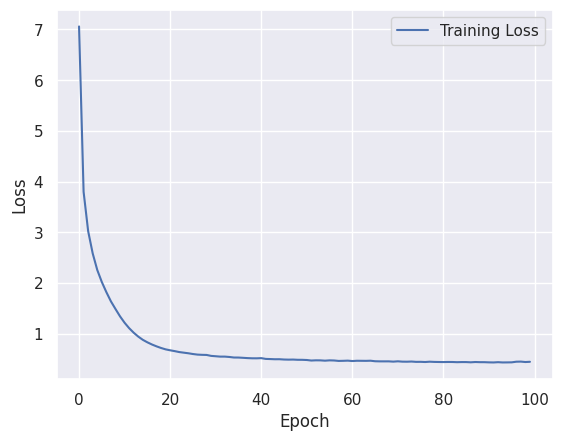

Epoch 1/100, Loss: 7.1534556448459625
Epoch 2/100, Loss: 4.0657899379730225
Epoch 3/100, Loss: 3.225873440504074
Epoch 4/100, Loss: 2.7644221484661102
Epoch 5/100, Loss: 2.41855987906456
Epoch 6/100, Loss: 2.1772534549236298
Epoch 7/100, Loss: 1.946120262145996
Epoch 8/100, Loss: 1.7609807252883911
Epoch 9/100, Loss: 1.5817006528377533
Epoch 10/100, Loss: 1.4308865368366241
Epoch 11/100, Loss: 1.286981076002121
Epoch 12/100, Loss: 1.1649672091007233
Epoch 13/100, Loss: 1.0655232667922974
Epoch 14/100, Loss: 0.9741009697318077
Epoch 15/100, Loss: 0.8981752693653107
Epoch 16/100, Loss: 0.8400371074676514
Epoch 17/100, Loss: 0.7950592786073685
Epoch 18/100, Loss: 0.7523982524871826
Epoch 19/100, Loss: 0.7255647405982018
Epoch 20/100, Loss: 0.6965872198343277
Epoch 21/100, Loss: 0.6771511435508728
Epoch 22/100, Loss: 0.6606075093150139
Epoch 23/100, Loss: 0.6413636431097984
Epoch 24/100, Loss: 0.6292753145098686
Epoch 25/100, Loss: 0.6176052242517471
Epoch 26/100, Loss: 0.6070316061377525


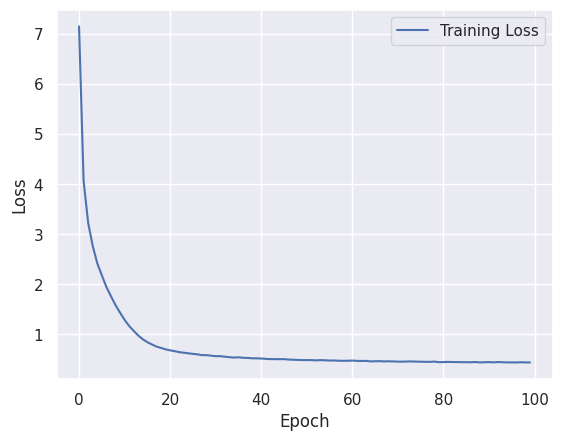

Epoch 1/100, Loss: 6.9169197380542755
Epoch 2/100, Loss: 3.9450665712356567
Epoch 3/100, Loss: 3.181067556142807
Epoch 4/100, Loss: 2.7163115441799164
Epoch 5/100, Loss: 2.385339677333832
Epoch 6/100, Loss: 2.127353221178055
Epoch 7/100, Loss: 1.9081664085388184
Epoch 8/100, Loss: 1.7393568605184555
Epoch 9/100, Loss: 1.5591978877782822
Epoch 10/100, Loss: 1.4089691489934921
Epoch 11/100, Loss: 1.266247808933258
Epoch 12/100, Loss: 1.1538257896900177
Epoch 13/100, Loss: 1.0465165078639984
Epoch 14/100, Loss: 0.9660723656415939
Epoch 15/100, Loss: 0.891199141740799
Epoch 16/100, Loss: 0.8359858989715576
Epoch 17/100, Loss: 0.7897802516818047
Epoch 18/100, Loss: 0.7521724849939346
Epoch 19/100, Loss: 0.7186701372265816
Epoch 20/100, Loss: 0.6908658072352409
Epoch 21/100, Loss: 0.6735068038105965
Epoch 22/100, Loss: 0.653728686273098
Epoch 23/100, Loss: 0.6369038820266724
Epoch 24/100, Loss: 0.6270344033837318
Epoch 25/100, Loss: 0.6117070689797401
Epoch 26/100, Loss: 0.5984326228499413
E

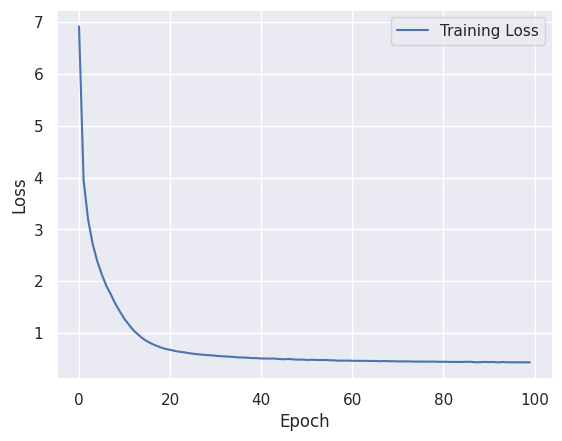

In [ ]:
#以dataset決定CVAE的訓練資料為何

cvae1 = cvae_train(dataset)
cvae2 = cvae_train(backtrans_train_dataset)
cvae3 = cvae_train(t5_train_dataset)
cvae4 = cvae_train(eda_train_dataset)

In [ ]:
def cvae_generate(cvae, dataset):
  cvae.eval()
  with torch.no_grad():
    for i in range(2, 3):

        reconstructed_embeddings = []
        dataloader = cvae_preprocessing(dataset)

        for batch in dataloader:
            embedding, label = batch
            reconstructed_embedding, _, _, _ = cvae(embedding, label)
            reconstructed_embeddings.append(reconstructed_embedding)

        reconstructed_embeddings = torch.cat(reconstructed_embeddings, dim=0) #讓batch(16,16,3)合成一個長度35的List torch.cat會轉成tensor
        dataset[f'small_dataset{i}']['cvae_embedding'] = reconstructed_embeddings.tolist()

In [ ]:
cvae_generate(cvae1, dataset)

In [ ]:
cvae_generate(cvae2, backtrans_train_dataset)
cvae_generate(cvae3, t5_train_dataset)
cvae_generate(cvae4, eda_train_dataset)

#會在這產出cvae_embedding

## 4-4-2. Linear Delta

In [ ]:
def linear_preprocessing(dataset): #整個dictionary進來

    dataset = dataset.reset_index(drop=True)
    dataset['linear_embedding'] = dataset['embedding'].copy()

    for i in range(2, 3):
      intents = dataset['intent'].unique()

    for intent in intents:
        select_df = dataset[dataset['intent'] == intent]
        embedding_diff = np.diff(select_df['embedding'].tolist(), axis=0)
        average_diff = np.mean(embedding_diff, axis=0)

        for index, row in select_df.iterrows():
          dataset.loc[index, 'linear_embedding'] = row['embedding'] + average_diff * 0.5

    return dataset

In [ ]:
#original data和augmented data針對linear delta的計算，是否要分開算差值取平均，亦或是一起算
backtrans_linear_train_dataset = {} #處理original + augmented data 的 embedding
backtrans_linear_train_dataset1 = {} #只處理original data 的 embedding
backtrans_linear_train_dataset2 = {}

t5_linear_train_dataset = {} #處理original + augmented data 的 embedding
t5_linear_train_dataset1 = {} #只處理original data 的 embedding
t5_linear_train_dataset2 = {}

eda_linear_train_dataset = {} #處理original + augmented data 的 embedding
eda_linear_train_dataset1 = {} #只處理original data 的 embedding
eda_linear_train_dataset2 = {}

for i in range(2, 3):
  backtrans_linear_train_dataset[f'small_dataset{i}'] = linear_preprocessing(backtrans_train_dataset[f'small_dataset{i}'])
  backtrans_linear_train_dataset1[f'small_dataset{i}'] = linear_preprocessing(backtrans_train_dataset[f'small_dataset{i}'])[:30]
  backtrans_linear_train_dataset2[f'small_dataset{i}'] = linear_preprocessing(backtrans_train_dataset[f'small_dataset{i}'])[30:]

  t5_linear_train_dataset[f'small_dataset{i}'] = linear_preprocessing(t5_train_dataset[f'small_dataset{i}'])
  t5_linear_train_dataset1[f'small_dataset{i}'] = linear_preprocessing(t5_train_dataset[f'small_dataset{i}'])[:30]
  t5_linear_train_dataset2[f'small_dataset{i}'] = linear_preprocessing(t5_train_dataset[f'small_dataset{i}'])[30:]

  eda_linear_train_dataset[f'small_dataset{i}'] = linear_preprocessing(eda_train_dataset[f'small_dataset{i}'])
  eda_linear_train_dataset1[f'small_dataset{i}'] = linear_preprocessing(eda_train_dataset[f'small_dataset{i}'])[:30]
  eda_linear_train_dataset2[f'small_dataset{i}'] = linear_preprocessing(eda_train_dataset[f'small_dataset{i}'])[30:]

### 4-5. Data Visualization on embeddings

In [ ]:
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
def visualize(dataset, embedding_genre):

  # 假设 dataset['small_dataset1'] 是你的 DataFrame，'cvae_embedding' 是包含嵌入的列
  # 你需要替换这个数据
  for i in range(2, 3):
    embs = np.array(dataset[embedding_genre].tolist())

  # 設置 K 值，即聚類的數量
  k = 6

  # 使用 K-Means 聚類
  kmeans = KMeans(n_clusters=k, random_state=42)
  dataset['cluster'] = kmeans.fit_predict(embs)

  tsne = TSNE(n_components=2, perplexity=10, random_state=42)
  embeddings_2d = tsne.fit_transform(embs)

  dataset['cluster'] = kmeans.labels_

  # 視覺化
  plt.figure(figsize=(10, 8))
  sns.scatterplot(x=embeddings_2d[:, 0], y=embeddings_2d[:, 1], hue=dataset['cluster'], palette='viridis', marker='o', legend='full')
  plt.title('t-SNE Visualization of 6 Clusters for small_dataset1')
  plt.show()


###4-5-1. embedding clustering

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


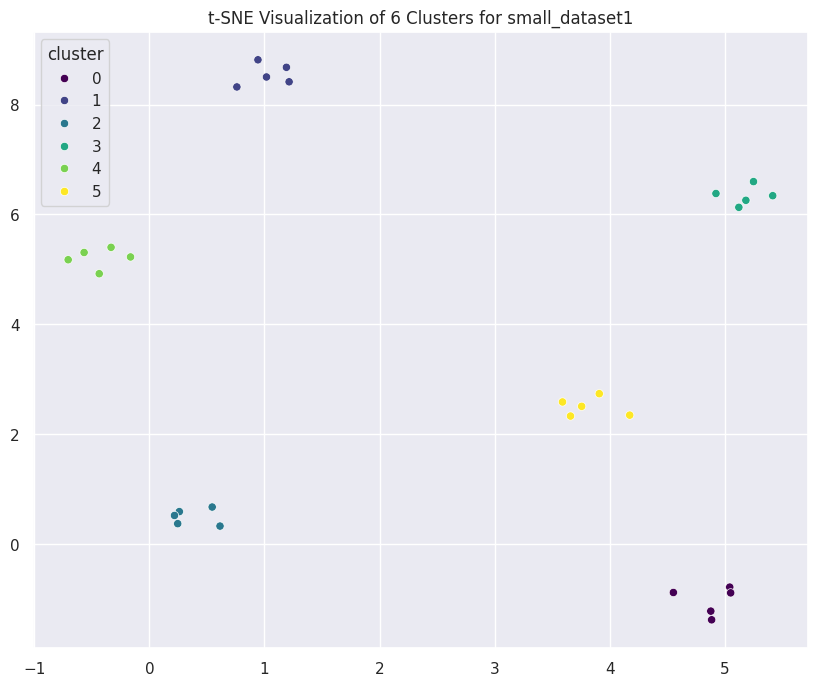

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


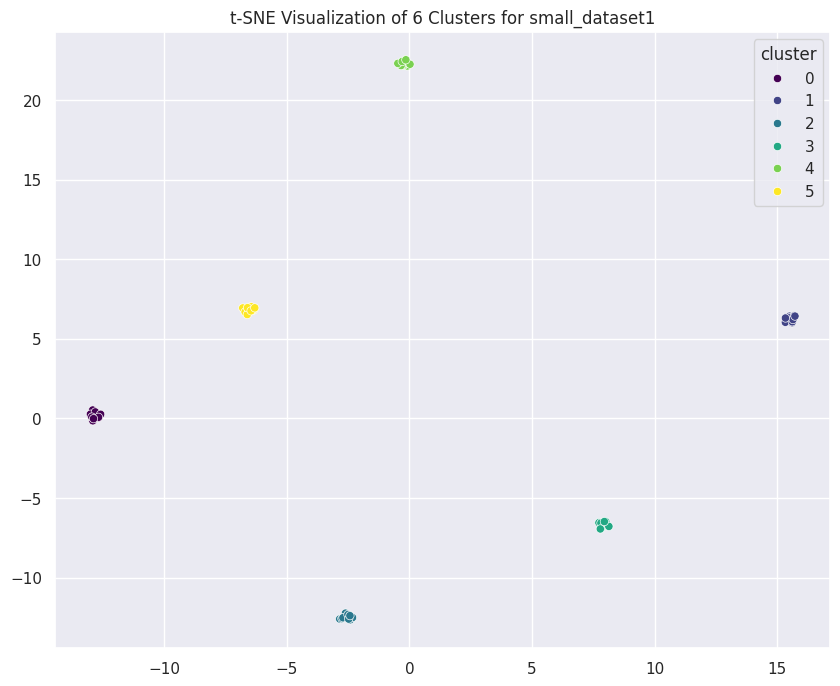

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


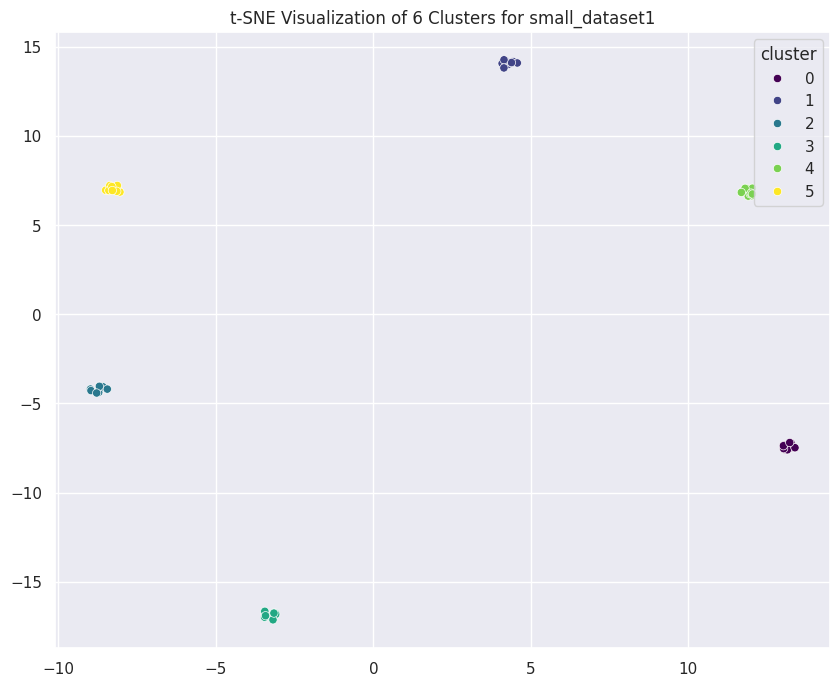

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


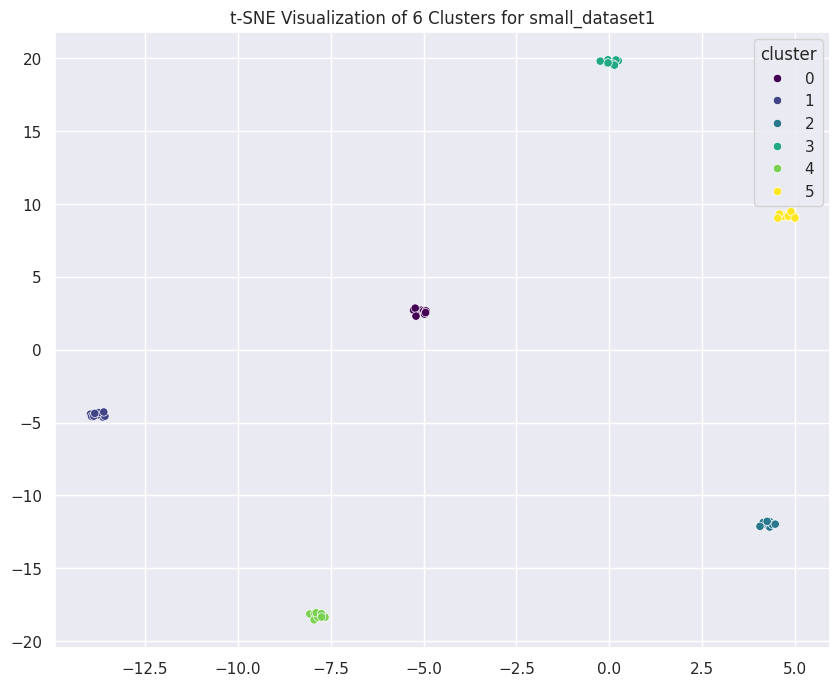

In [ ]:
for i in range(2, 3):
  plt1 = visualize(dataset[f'small_dataset{i}'], 'embedding')
  plt2 = visualize(backtrans_train_dataset[f'small_dataset{i}'], 'embedding')
  plt3 = visualize(t5_train_dataset[f'small_dataset{i}'], 'embedding')
  plt4 = visualize(eda_train_dataset[f'small_dataset{i}'], 'embedding')

### 4-5-2. cvae_embedding clustering

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


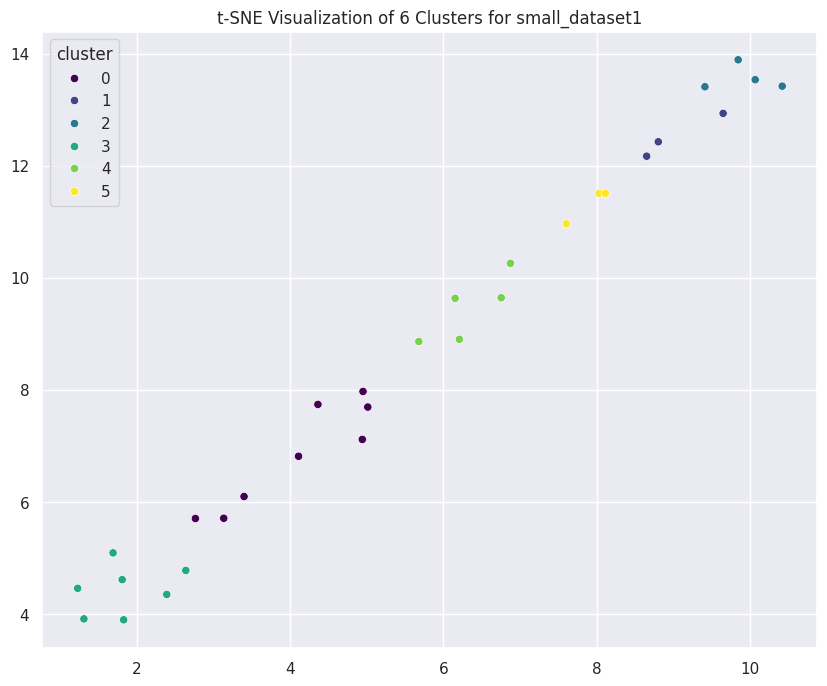

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


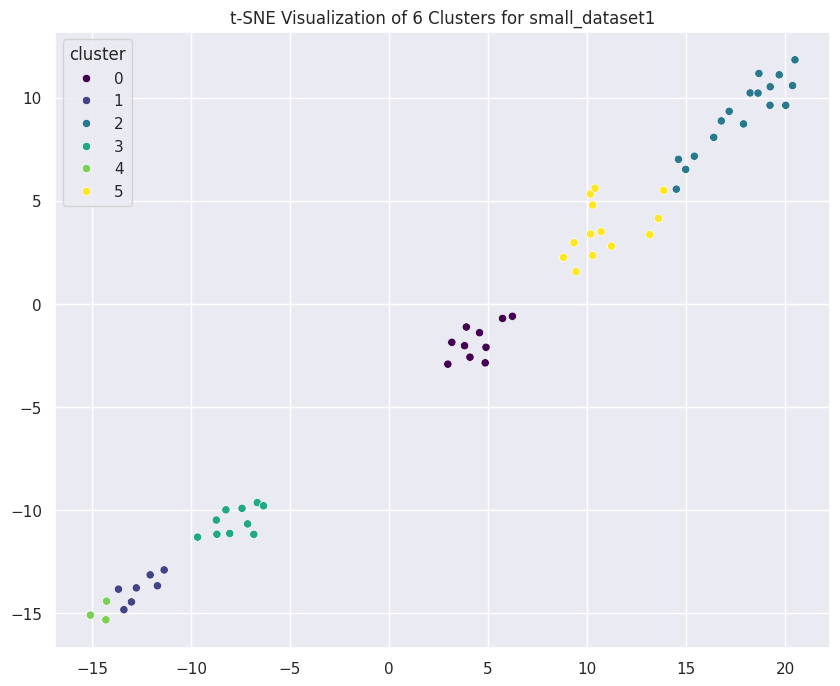

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


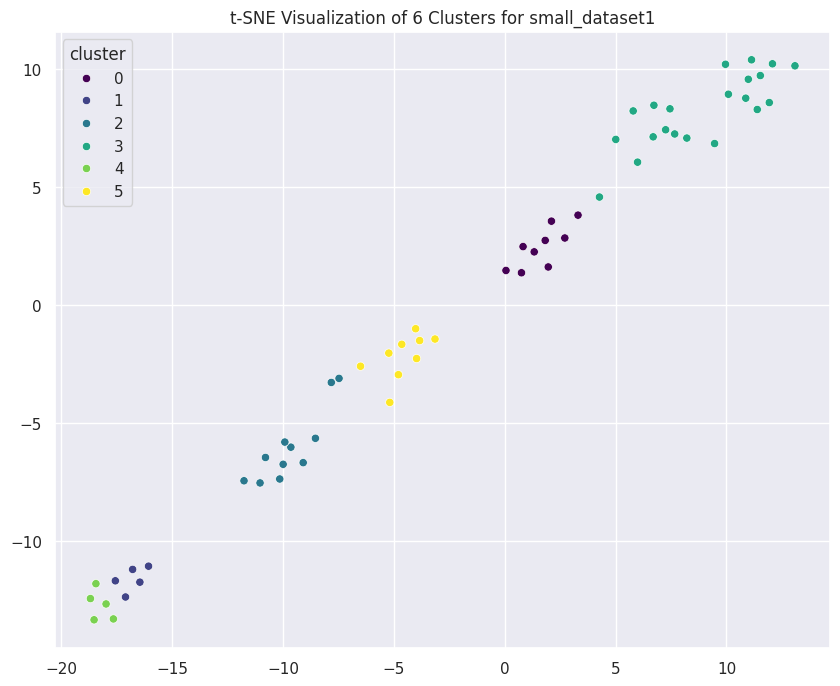

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


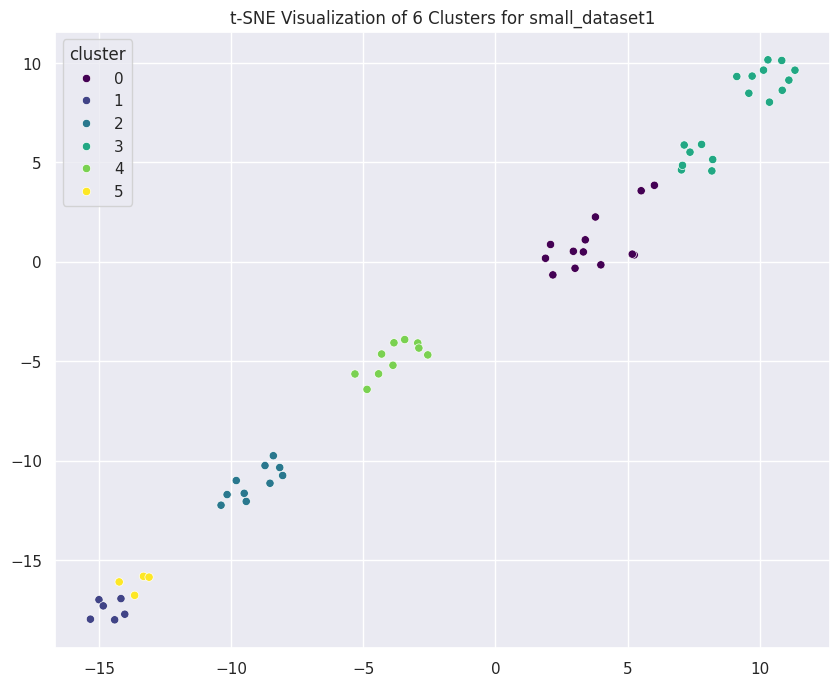

In [ ]:
for i in range(2, 3):
  plt5 = visualize(dataset[f'small_dataset{i}'], 'cvae_embedding')
  plt6 = visualize(backtrans_train_dataset[f'small_dataset{i}'], 'cvae_embedding')
  plt7 = visualize(t5_train_dataset[f'small_dataset{i}'], 'cvae_embedding')
  plt8 = visualize(eda_train_dataset[f'small_dataset{i}'], 'cvae_embedding')

### 4-5-3. linear_embedding clustering

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


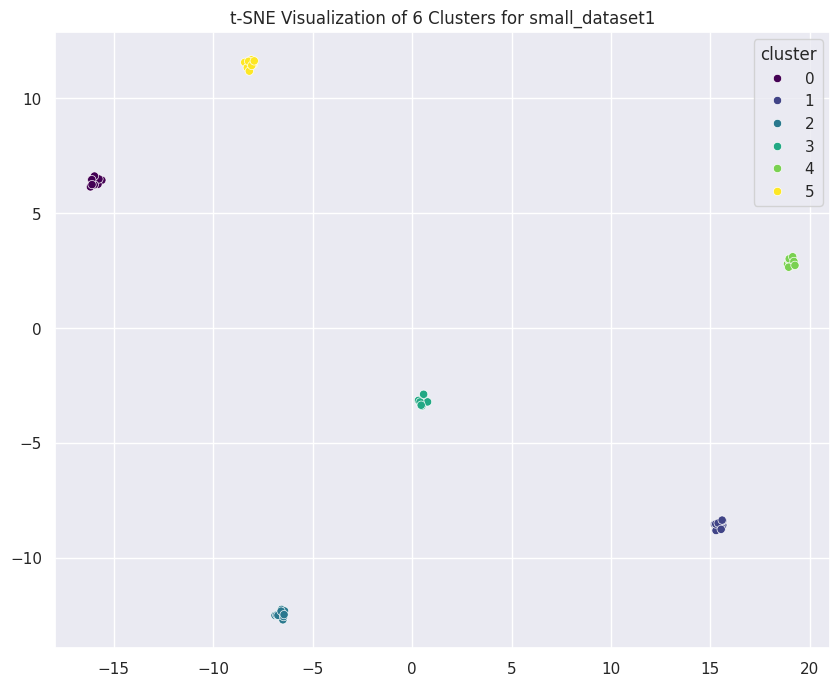

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


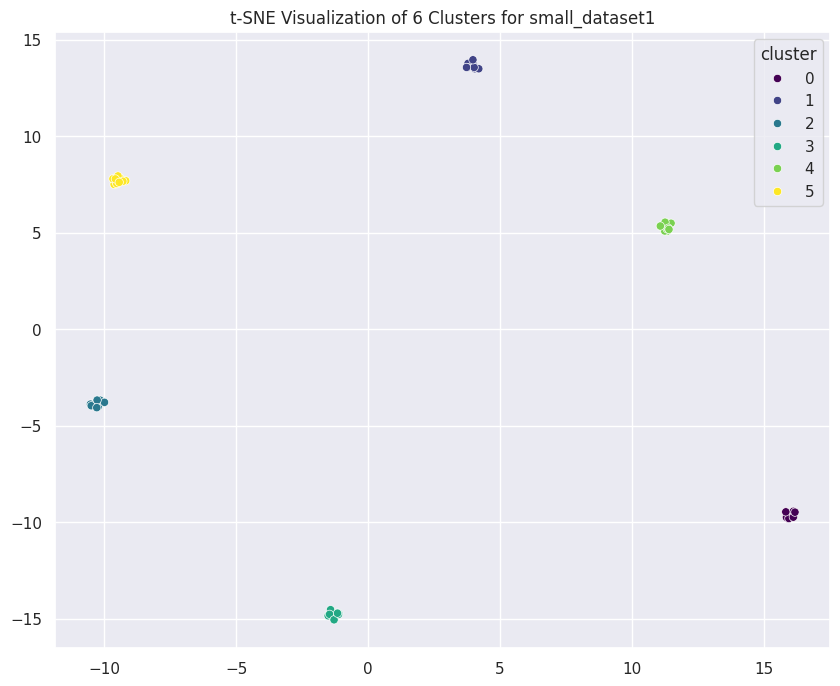

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


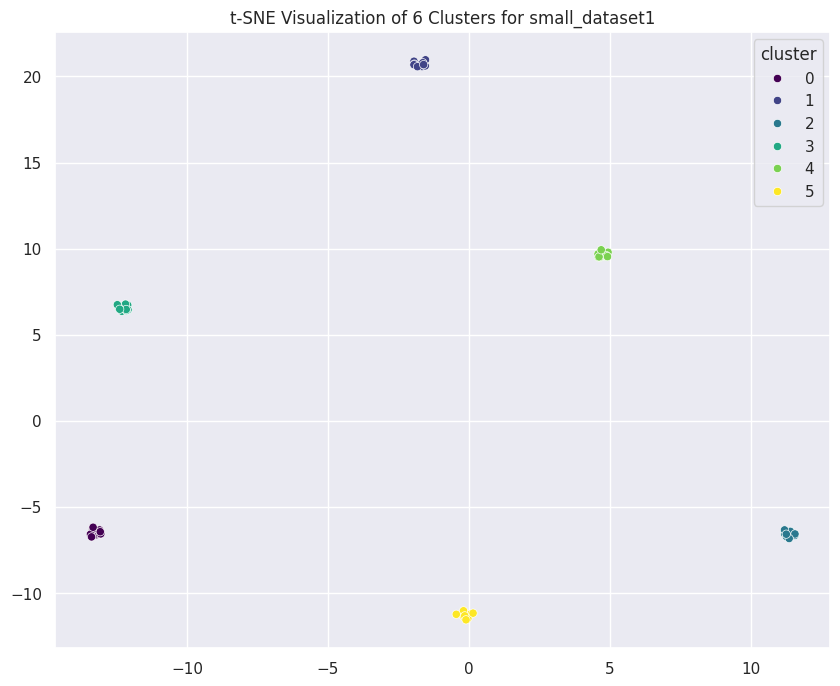

In [ ]:
for i in range(2, 3):
  plt9 = visualize(backtrans_linear_train_dataset[f'small_dataset{i}'], 'linear_embedding')
  plt10 = visualize(t5_linear_train_dataset[f'small_dataset{i}'], 'linear_embedding')
  plt11 = visualize(eda_linear_train_dataset[f'small_dataset{i}'], 'linear_embedding')

#5. 開始fine tune MLP Classifier

## 5-1. 定義好class & function
*   class
  *   **SoftmaxClassifier**

*   def
  *   **e2d:** embedding包進dataloader當作MLP的input
  *   **train_mlp:** 訓練MLP classifier



In [ ]:
class SoftmaxClassifier(nn.Module):
    def __init__(self, num_classes):
        super(SoftmaxClassifier, self).__init__()
        self.pooler_dense = nn.Linear(in_features=768, out_features=768, bias=True)
        self.activation = nn.Tanh()
        self.dropout = nn.Dropout(p=0.1, inplace=False)
        self.classifier = nn.Linear(in_features=768, out_features=num_classes, bias=True)

    def forward(self, x):
        x = self.pooler_dense(x)
        x = self.activation(x)
        x = self.dropout(x)
        x = self.classifier(x)
        return x

In [ ]:
def e2d(embeddings):

  # intent_to_label = {
  #       "PlayMusic": 0, 'AddToPlaylist': 1, 'RateBook': 2, 'SearchScreeningEvent': 3,
  #       'BookRestaurant': 4, 'GetWeather': 5, 'SearchCreativeWork': 6
  # }
  batch_size = 8
  dataloader = {}

  for i in range(2, 3):
    embedding = torch.Tensor(embeddings[f'small_dataset{i}']['embedding'].tolist())
    # intent = torch.tensor(embeddings[f'small_dataset{i}']['intent'].map(intent_to_label).tolist(), dtype=torch.long)
    intent = torch.tensor(embeddings[f'small_dataset{i}']['intent'].tolist(), dtype=torch.long)
    tensor = TensorDataset(embedding, intent)
    dataloader[f'small_dataset{i}'] = DataLoader(tensor, batch_size=batch_size, shuffle=True)

  return dataloader

def train_mlp (embeddings):
  batch_size = 8
  input_dim = 768
  output_dim = 6
  dataloader = e2d(embeddings)
  classifier = SoftmaxClassifier(output_dim)
  criterion = nn.CrossEntropyLoss()
  optimizer = optim.Adam(classifier.parameters(), lr=5e-5)

  num_epochs = 3
  training_losses = []

  for epoch in range(num_epochs):
    classifier.train()
    total_loss = 0.0
    for i in range(2, 3):
      for batch in dataloader[f'small_dataset{i}']:
          input, label = batch
          optimizer.zero_grad()
          outputs = classifier(input)
          loss = criterion(outputs, label)
          loss.backward()
          optimizer.step()

          total_loss += loss.item()

      avg_loss = total_loss / len(dataloader[f'small_dataset{i}'])
      training_losses.append(avg_loss)

      print(f'Epoch {epoch + 1}/{num_epochs}, Loss: {avg_loss}')

  plt.plot(training_losses, label='Training Loss')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.legend()
  plt.show()

  return classifier

##5-2. Training MLP Classifier

Epoch 1/3, Loss: 1.6713334321975708
Epoch 2/3, Loss: 1.3549352884292603
Epoch 3/3, Loss: 1.0803592056035995


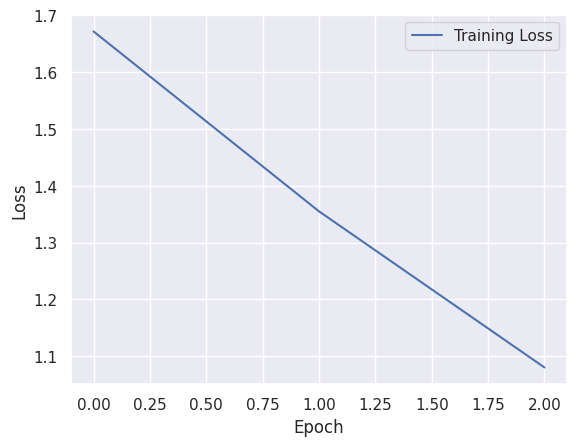

Epoch 1/3, Loss: 1.4004895836114883
Epoch 2/3, Loss: 0.8444594666361809
Epoch 3/3, Loss: 0.4886345639824867


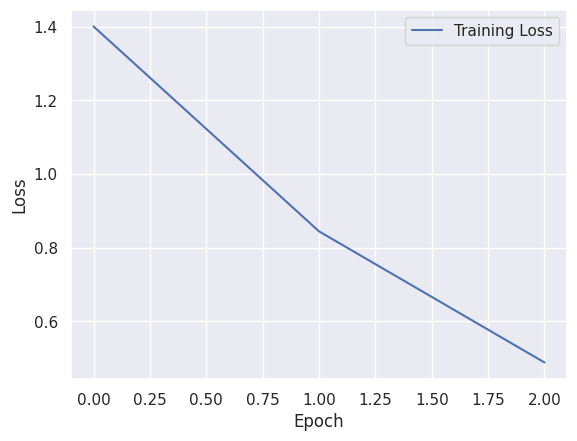

Epoch 1/3, Loss: 1.4326933771371841
Epoch 2/3, Loss: 0.8873990774154663
Epoch 3/3, Loss: 0.5264158248901367


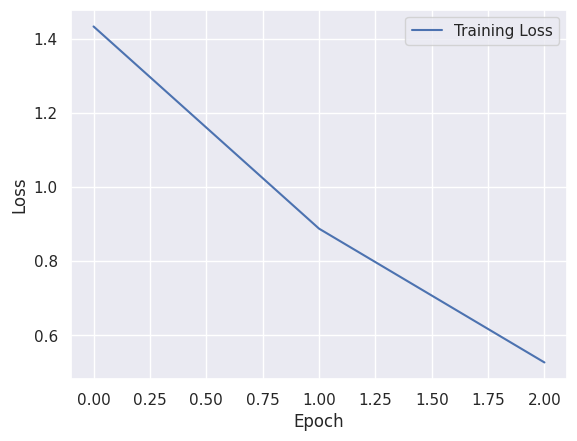

Epoch 1/3, Loss: 1.6267536878585815
Epoch 2/3, Loss: 1.0265184938907623
Epoch 3/3, Loss: 0.6238555908203125


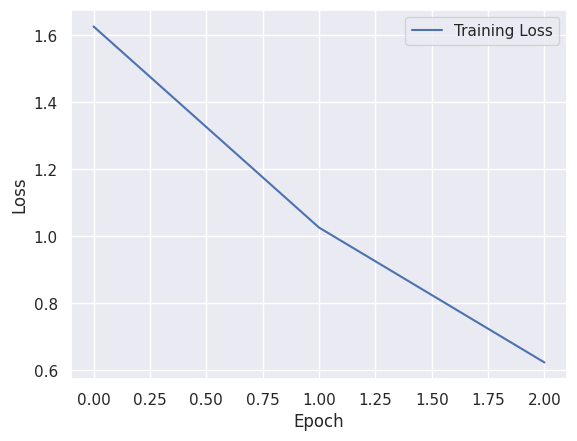

In [ ]:
classifier1 = train_mlp(dataset)
classifier2 = train_mlp(backtrans_train_dataset)
classifier3 = train_mlp(t5_train_dataset)
classifier4 = train_mlp(eda_train_dataset)

##5-3. Training MLP Classifier :Phase 2

### 5-3-1. Prepare **Phase1 + CVAE** data for MLP training

In [ ]:
def concat(dataset1, dataset2):

  for i in range(2, 3):
    df1 = dataset2[f'small_dataset{i}'][['embedding','intent']]
    df2 = dataset1[f'small_dataset{i}'][['cvae_embedding','intent']]
    df2 = df2.rename(columns={'cvae_embedding': 'embedding'})

    # 使用 pd.concat 合并两个 DataFrame
    result_df = pd.concat([df1, df2], axis=0)
  return result_df

In [ ]:
#第一個參數決定，要concat的cvae embedding是根據哪個資料集生成的

backtrans_cvae_train_dataset = {}
t5_cvae_train_dataset = {}
eda_cvae_train_dataset = {}

for i in range(2, 3):
  backtrans_cvae_train_dataset[f'small_dataset{i}'] = concat(backtrans_train_dataset, backtrans_train_dataset)
  t5_cvae_train_dataset[f'small_dataset{i}'] = concat(t5_train_dataset, t5_train_dataset)
  eda_cvae_train_dataset[f'small_dataset{i}'] = concat(eda_train_dataset, eda_train_dataset)

In [ ]:
#第一個參數決定，要concat的cvae embedding是根據哪個資料集生成的

backtrans_cvae_on_original_train_dataset = {}
t5_cvae_on_original_train_dataset = {}
eda_cvae_on_original_train_dataset = {}

for i in range(2, 3):
  backtrans_cvae_on_original_train_dataset[f'small_dataset{i}'] = concat(dataset, backtrans_train_dataset)
  t5_cvae_on_original_train_dataset[f'small_dataset{i}'] = concat(dataset, t5_train_dataset)
  eda_cvae_on_original_train_dataset[f'small_dataset{i}'] = concat(dataset, eda_train_dataset)

Epoch 1/3, Loss: 1.6158345341682434
Epoch 2/3, Loss: 1.1683458636204402
Epoch 3/3, Loss: 0.9118305345376333


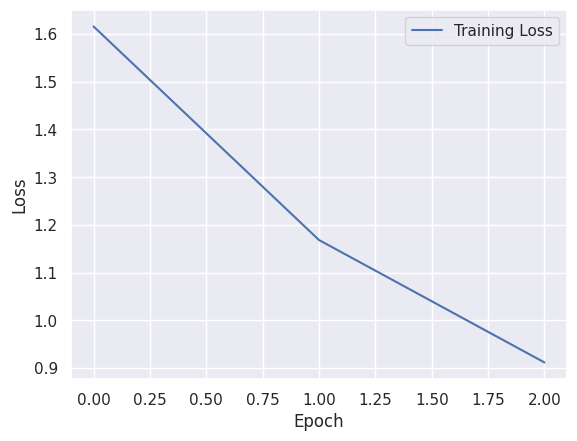

Epoch 1/3, Loss: 1.511088525255521
Epoch 2/3, Loss: 1.054145375887553
Epoch 3/3, Loss: 0.9188454449176788


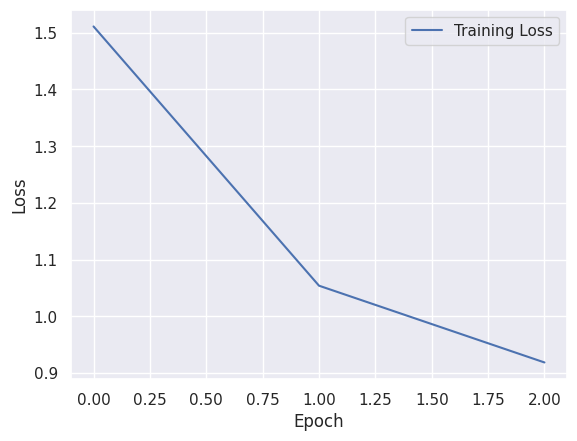

Epoch 1/3, Loss: 1.6486909488836925
Epoch 2/3, Loss: 1.1827880889177322
Epoch 3/3, Loss: 0.925257662932078


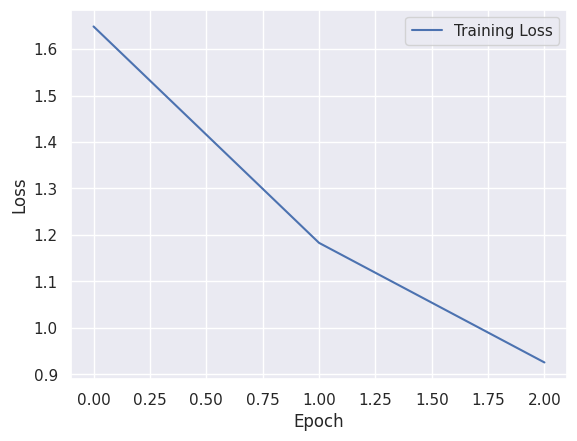

Epoch 1/3, Loss: 1.6099683920542398
Epoch 2/3, Loss: 1.2320285836855571
Epoch 3/3, Loss: 1.0507207274436952


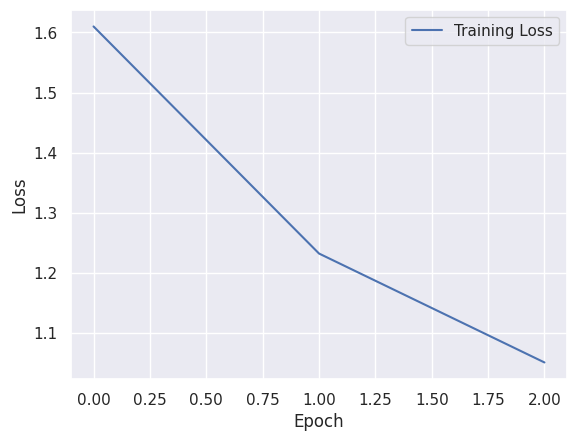

Epoch 1/3, Loss: 1.6090032815933228
Epoch 2/3, Loss: 1.2283971230189006
Epoch 3/3, Loss: 1.0417357802391052


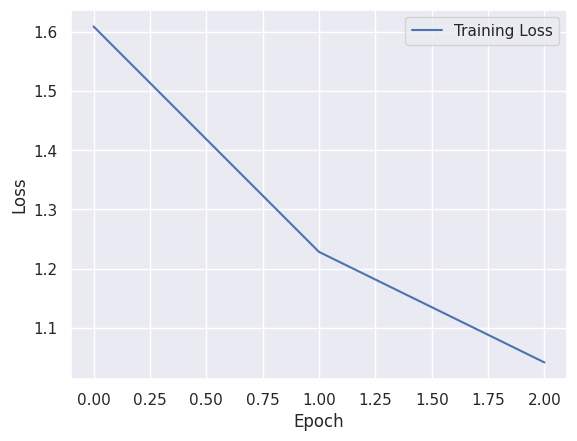

Epoch 1/3, Loss: 1.591173481941223
Epoch 2/3, Loss: 1.218696657816569
Epoch 3/3, Loss: 1.052787983417511


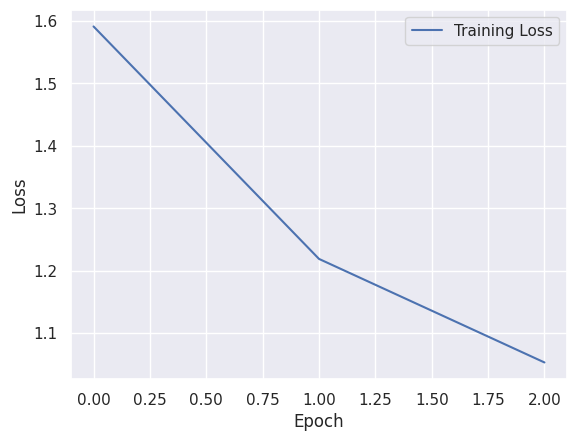

In [ ]:
classifier5 = train_mlp(backtrans_cvae_on_original_train_dataset)
classifier6 = train_mlp(t5_cvae_on_original_train_dataset)
classifier7 = train_mlp(eda_cvae_on_original_train_dataset)

classifier8 = train_mlp(backtrans_cvae_train_dataset)
classifier9 = train_mlp(t5_cvae_train_dataset)
classifier10 = train_mlp(eda_cvae_train_dataset)

### 5-3-2. Prepare **Phase1 + Linear Delta** data for MLP training

In [ ]:
def concat2(dataset1, dataset2):

  for i in range(2, 3):
    df1 = dataset2[f'small_dataset{i}'][['embedding','intent']]
    df2 = dataset1[f'small_dataset{i}'][['linear_embedding','intent']]
    df2 = df2.rename(columns={'linear_embedding': 'embedding'})

    # 使用 pd.concat 合并两个 DataFrame
    result_df = pd.concat([df1, df2], axis=0)
  return result_df

In [ ]:
#第一個參數決定，要concat的linear embedding是根據哪個資料集生成的

backtrans_linear_on_original_train_dataset = {} #只拿original data 的 embedding 和 linear embedding
backtrans_linear_on_all_train_dataset = {} #拿original data + augmented data 的 embedding 和 linear embedding

t5_linear_on_original_train_dataset = {} #只拿original data 的 embedding 和 linear embedding
t5_linear_on_all_train_dataset = {} #拿original data + augmented data 的 embedding 和 linear embedding

eda_linear_on_original_train_dataset = {} #只拿original data 的 embedding 和 linear embedding
eda_linear_on_all_train_dataset = {} #拿original data + augmented data 的 embedding 和 linear embedding
# t5_cvae_train_dataset = {}
# eda_cvae_train_dataset = {}

for i in range(2, 3):
  backtrans_linear_on_original_train_dataset[f'small_dataset{i}'] = concat2(backtrans_linear_train_dataset1, backtrans_linear_train_dataset1)
  backtrans_linear_on_all_train_dataset[f'small_dataset{i}'] = concat2(backtrans_linear_train_dataset, backtrans_linear_train_dataset)

  t5_linear_on_original_train_dataset[f'small_dataset{i}'] = concat2(t5_linear_train_dataset1, t5_linear_train_dataset1)
  t5_linear_on_all_train_dataset[f'small_dataset{i}'] = concat2(t5_linear_train_dataset, t5_linear_train_dataset)

  eda_linear_on_original_train_dataset[f'small_dataset{i}'] = concat2(eda_linear_train_dataset1, eda_linear_train_dataset1)
  eda_linear_on_all_train_dataset[f'small_dataset{i}'] = concat2(eda_linear_train_dataset, eda_linear_train_dataset)
  # t5_cvae_train_dataset[f'small_dataset{i}'] = concat(t5_train_dataset, t5_train_dataset)
  # eda_cvae_train_dataset[f'small_dataset{i}'] = concat(eda_train_dataset, eda_train_dataset)

Epoch 1/3, Loss: 1.5377987325191498
Epoch 2/3, Loss: 0.965388759970665
Epoch 3/3, Loss: 0.5706826262176037


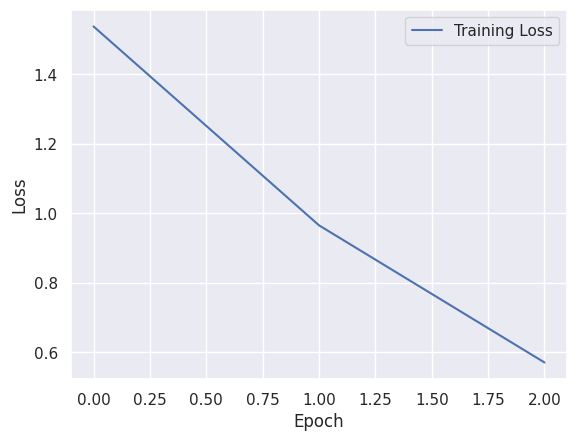

Epoch 1/3, Loss: 1.3903415948152542
Epoch 2/3, Loss: 0.851544164121151
Epoch 3/3, Loss: 0.4907088354229927


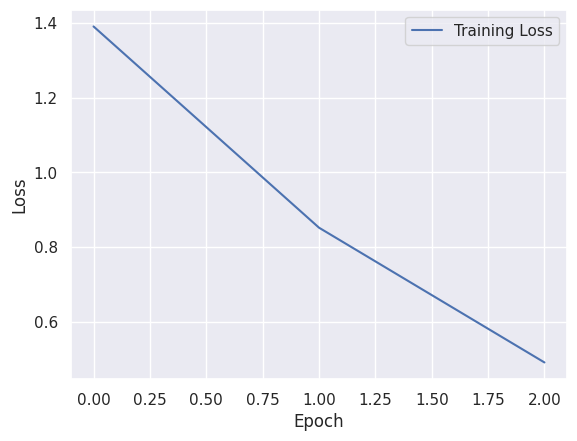

Epoch 1/3, Loss: 1.471831351518631
Epoch 2/3, Loss: 0.915577158331871
Epoch 3/3, Loss: 0.5290731675922871


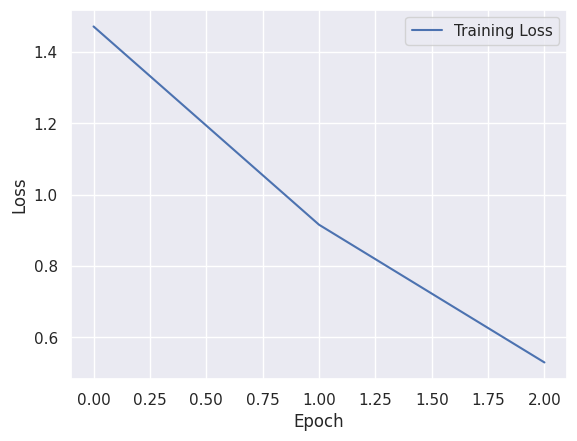

Epoch 1/3, Loss: 1.2848496158917746
Epoch 2/3, Loss: 0.5129068930943806
Epoch 3/3, Loss: 0.21734025776386262


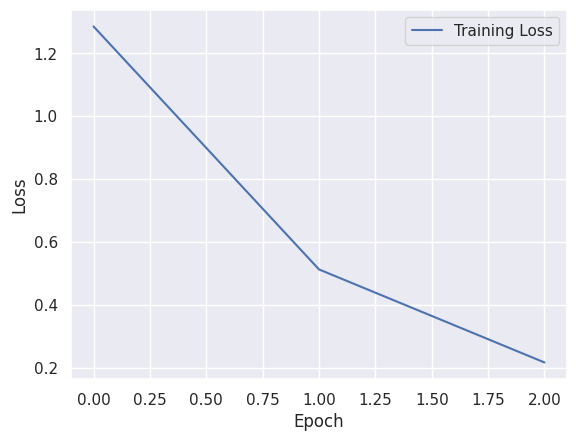

Epoch 1/3, Loss: 1.2148140748341878
Epoch 2/3, Loss: 0.4541812082131704
Epoch 3/3, Loss: 0.18551549116770427


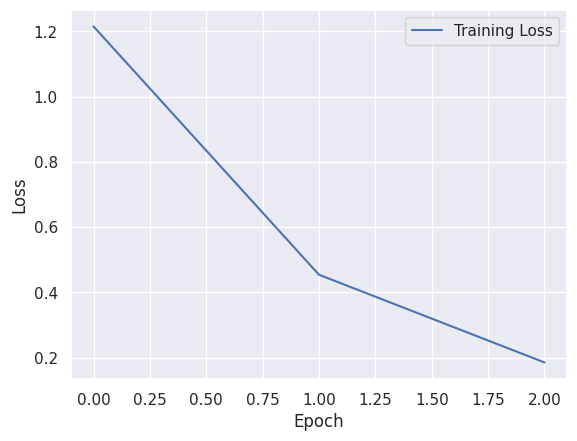

Epoch 1/3, Loss: 1.2900961637496948
Epoch 2/3, Loss: 0.5158109347025553
Epoch 3/3, Loss: 0.21841024259726208


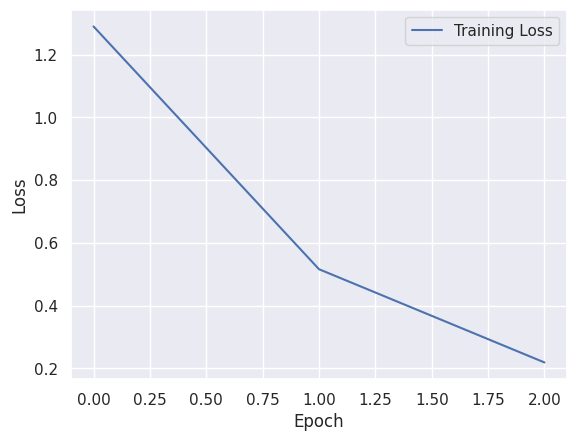

In [ ]:
classifier11 = train_mlp(backtrans_linear_on_original_train_dataset)
classifier12 = train_mlp(t5_linear_on_original_train_dataset)
classifier13 = train_mlp(eda_linear_on_original_train_dataset)

classifier14 = train_mlp(backtrans_linear_on_all_train_dataset)
classifier15 = train_mlp(t5_linear_on_all_train_dataset)
classifier16 = train_mlp(eda_linear_on_all_train_dataset)

# **6. Validation Set**


*   6-1.   Validation dataset -> [BERT] -> validation embedding
*   6-2.   Validation embedding -> [MLP] -> Result

## 6-1. Validation Set preprocessing: Dataset -> Embedding

In [ ]:
# def get_validate_embedding(model):

#   valid = pd.read_csv("valid.csv")

#   intent_to_label = {
#           "PlayMusic": 0, 'AddToPlaylist': 1, 'RateBook': 2, 'SearchScreeningEvent': 3,
#           'BookRestaurant': 4, 'GetWeather': 5, 'SearchCreativeWork': 6
#       }

#   embeddings_list = []
#   labels_list = []
#   for index, row in valid.iterrows():
#       text = row['text']
#       label = row['intent']
#       embedding = text_to_embedding(text, model=model, tokenizer=tokenizer, device=device)
#       embeddings_list.append(embedding)
#       labels_list.append(label)

#   valid['embedding']= embeddings_list
#   # valid['intent'] = valid['intent'].map(intent_to_label)
#   valid_tensor = TensorDataset(torch.Tensor(valid['embedding'].tolist()), torch.LongTensor(valid['intent'].tolist()))
#   valid_dataloader = DataLoader(valid_tensor, batch_size=32, shuffle=True)
#   return valid_dataloader

In [ ]:
# #根據不同model來encode成embedding
# #valid1使用model1，也就是使用原始資料來fine tune的BERT，當作feature extractor

# valid1 = get_validate_embedding(model1)
# valid2 = get_validate_embedding(model2)
# valid3 = get_validate_embedding(model3)
# valid4 = get_validate_embedding(model4)

## 6-2. Calculate accuracy on validation set

In [ ]:
# def validate(classifier, valid_dataloader):
#   classifier.eval()
#   total_correct = 0
#   total_samples = 0

#   with torch.no_grad():
#       for batch in valid_dataloader:
#           input, label = batch
#           outputs = classifier(input)
#           predictions = torch.argmax(outputs, dim=1)

#           total_correct += (predictions == label).sum().item()
#           total_samples += label.size(0)

#       accuracy = round(total_correct / total_samples, 4)

#       return accuracy

In [ ]:
# print(validate(classifier1, valid1))

# print(validate(classifier2, valid2))
# print(validate(classifier3, valid3))
# print(validate(classifier4, valid4))

# print(validate(classifier5, valid2))
# print(validate(classifier6, valid3))
# print(validate(classifier7, valid4))

# # print(validate(classifier5, valid2))
# # print(validate(classifier6, valid3))
# # print(validate(classifier7, valid4))

# #valid2-4會比較好的原因可能為: (1)classifier訓練量多 (2)feature extractor接收的資訊更多
# #(1)和(2)綜合起來，導致效能提升

#**7. Test set**

*   7-1.   Test dataset -> [BERT] -> test embedding
*   7-2.   Test embedding -> [MLP] -> Result

##7-1. Test Set preprocessing: Dataset -> Embedding

In [ ]:
test

,text,intent
0,How far is it from Denver to Aspen ?,4
1,"What county is Modesto , California in ?",5
2,Who was Galileo ?,3
3,What is an atom ?,0
4,When did Hawaii become a state ?,4
...,...,...
495,Who was the 22nd President of the US ?,3
496,What is the money they use in Zambia ?,1
497,How many feet in a mile ?,4
498,What is the birthstone of October ?,1


In [ ]:
def get_test_embedding(model):
  # test = pd.read_csv("test.csv")
  # intent_to_label = {
  #         "PlayMusic": 0, 'AddToPlaylist': 1, 'RateBook': 2, 'SearchScreeningEvent': 3,
  #         'BookRestaurant': 4, 'GetWeather': 5, 'SearchCreativeWork': 6
  #     }

  embeddings_list = []
  labels_list = []
  for index, row in test.iterrows():
      text = row['text']
      label = row['intent']
      embedding = text_to_embedding(text, model=model, tokenizer=tokenizer, device=device)
      embeddings_list.append(embedding)
      labels_list.append(label)

  test['embedding']= embeddings_list
  # test['intent'] = test['intent'].map(intent_to_label)
  test_tensor = TensorDataset(torch.Tensor(test['embedding'].tolist()), torch.LongTensor(test['intent'].tolist()))
  test_dataloader = DataLoader(test_tensor, batch_size=32, shuffle=True)
  return test_dataloader

In [ ]:
test1 = get_test_embedding(model=model1)
test2 = get_test_embedding(model=model2)
test3 = get_test_embedding(model=model3)
test4 = get_test_embedding(model=model4)

In [ ]:
test1

## 7-2. Calculate Test Set Accuracy

In [ ]:
def test(classifier, test_dataloader):
  classifier.eval()
  total_correct = 0
  total_samples = 0

  with torch.no_grad():
      for batch in test_dataloader:
          input, label = batch
          outputs = classifier(input)
          predictions = torch.argmax(outputs, dim=1)

          total_correct += (predictions == label).sum().item()
          total_samples += label.size(0)

      accuracy = round(total_correct / total_samples, 4)
      # print(f'Test Accuracy: {accuracy}')
      return accuracy

In [ ]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

def test(classifier, test_dataloader):
    classifier.eval()
    total_correct = 0
    total_samples = 0
    all_labels = []
    all_predictions = []

    with torch.no_grad():
        for batch in test_dataloader:
            input, label = batch
            outputs = classifier(input)
            predictions = torch.argmax(outputs, dim=1)

            total_correct += (predictions == label).sum().item()
            total_samples += label.size(0)

            all_labels.extend(label.cpu().numpy())
            all_predictions.extend(predictions.cpu().numpy())

    accuracy = round(total_correct / total_samples, 4)

    # Calculate precision, recall, f1-score, and support for each class
    precision, recall, f1, _ = precision_recall_fscore_support(all_labels, all_predictions, average='weighted')

    # Calculate the geometric mean of precision, recall, and f1-score
    gmean = (precision * recall * f1) ** (1/3)
    return accuracy, gmean


In [ ]:
print(test(classifier1, test1))

print(test(classifier2, test2))
print(test(classifier3, test3))
print(test(classifier4, test4))

print(test(classifier5, test2))
print(test(classifier6, test3))
print(test(classifier7, test4))

print(test(classifier8, test2))
print(test(classifier9, test3))
print(test(classifier10, test4))

print(test(classifier11, test2))
print(test(classifier12, test3))
print(test(classifier13, test4))

print(test(classifier14, test2))
print(test(classifier15, test3))
print(test(classifier16, test4))

(0.53, 0.5337173199018571)
(0.552, 0.5594679266995105)
(0.584, 0.586476829034876)
(0.522, 0.5322332611543368)
(0.576, 0.5901765369228879)
(0.598, 0.5974623662198264)
(0.53, 0.5440717699009895)
(0.558, 0.579880994393227)
(0.586, 0.5804482033020966)
(0.53, 0.5419204807287995)
(0.566, 0.588374238723233)
(0.568, 0.5650705375967542)
(0.522, 0.5339474249623465)
(0.55, 0.5631740493696834)
(0.578, 0.5778769715193719)
(0.518, 0.5331846637460398)


In [ ]:
from sklearn.metrics import classification_report
import torch

def test_2(classifier, test_dataloader):
    classifier.eval()
    all_labels = []
    all_predictions = []

    with torch.no_grad():
        for batch in test_dataloader:
            input, label = batch
            outputs = classifier(input)
            predictions = torch.argmax(outputs, dim=1)

            all_labels.extend(label.cpu().numpy())
            all_predictions.extend(predictions.cpu().numpy())

    report = classification_report(all_labels, all_predictions)

    return report


In [ ]:
print(test_2(classifier1, test1))

print(test_2(classifier2, test2))
print(test_2(classifier3, test3))
print(test_2(classifier4, test4))

print(test_2(classifier5, test2))
print(test_2(classifier6, test3))
print(test_2(classifier7, test4))

print(test_2(classifier8, test2))
print(test_2(classifier9, test3))
print(test_2(classifier10, test4))

print(test_2(classifier11, test2))
print(test_2(classifier12, test3))
print(test_2(classifier13, test4))

print(test_2(classifier14, test2))
print(test_2(classifier15, test3))
print(test_2(classifier16, test4))

              precision    recall  f1-score   support

           0       0.72      0.21      0.33       138
           1       0.24      0.30      0.27        94
           2       0.39      1.00      0.56         9
           3       0.66      0.83      0.73        65
           4       0.65      0.88      0.74       113
           5       0.53      0.57      0.55        81

    accuracy                           0.53       500
   macro avg       0.53      0.63      0.53       500
weighted avg       0.57      0.53      0.50       500

              precision    recall  f1-score   support

           0       0.33      0.06      0.10       138
           1       0.30      0.71      0.43        94
           2       0.43      1.00      0.60         9
           3       0.98      0.82      0.89        65
           4       0.97      0.62      0.76       113
           5       0.63      0.85      0.73        81

    accuracy                           0.55       500
   macro avg       0.61